<div style="background-color: RGB(230,115,0);">
    <h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center; font-weight: bold; text-decoration: underline; font-style: ;">PROJET 9 - DATA ANALYST</h1>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center; font-weight: bold; text-decoration: underline; font-style: ;">Produisez une étude de marché avec R ou Python</h2>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center; font-weight: bold; text-decoration: ; font-style: italic;">Partie 1 - Preparation, analyse et exploration </h2>
</div> 

<h2><span style="font-weight: bold; text-decoration: underline;">Objectifs :</span></h2>
<h2>1 - Préparation des données</h2>
<ul style="color: green;">
  <li>Importations des données et des librairies</li>
  <li>Observations des dataframes</li>
</ul>
<h2>2 - Nettoyage des données</h2>
<ul style="color: green;">
  <li>Consultation générale des données (doublons, valeurs manquantes...)</li>
  <li>Travaillons sur nos données</li>
  <li>Fusionnons les données</li>
</ul>
<h2>3 - Exploration des données (ACP, cercle des corrélations, projection)</h2>
<ul style="color: green;">
  <li>ACP</li>
  <li>Cercle des corrélations</li>
  <li>Projection des individus (Pays)</li>
</ul>

**_______________________________________________________________________________________________**

<div style="border: 2px solid red; padding: 10px;">
  <span style="font-weight: bold; color: red;">
    A noter que toutes les données ci-dessous sont déjà ciblées sur :
    <br><br>
    <b>L'année : **2021</b>
    <br><br>
    <b>Le produit : **Poulet</b>
    <br><br>
    Ces données ont été préfiltrées directement depuis l'outil de téléchargement disponible sur le site de la FAO dont voici le lien : 
    <a href="https://www.fao.org/faostat/fr/#data" style="color: red; font-weight: bold;">https://www.fao.org/faostat/fr/#data</a>
  </span>
</div>


**_______________________________________________________________________________________________**

# 1 - Preparation des données 

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Importations des données et librairies </span></li>
</ul>


In [1]:
# Importations des librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# On charge seaborn

sns.set()

In [3]:
# Récupération des données préfiltrées sur le poulet depuis le site de la FAO et sur l'année 2021 + ajout des données 

df_export_import_poulet = pd.read_csv("FAOSTAT export-import poulet prix 2021.csv")
df_poulet = pd.read_csv("FAO - Poulet stat 2021.csv")
df_population = pd.read_csv("FAOSTAT_population 2021.csv")
df_pib = pd.read_csv("FAOSTAT_PIB.csv")
df_inflation = pd.read_csv("FAOSTAT_inflation.csv")
df_sous_nutrition_stabilite_politique = pd.read_csv("FAOSTAT_sous_nutrition_et stabilité_politique.csv")
df_ecologie = pd.read_csv("FAOSTAT_emission eco.csv")

In [4]:
display(df_export_import_poulet.head())
display(df_poulet.head())
display(df_population.head())
display(df_pib.head())
display(df_inflation.head())
display(df_sous_nutrition_stabilite_politique.head())
display(df_ecologie.head())

Code Domaine                       Domaine  Code zone (M49)            Zone  \
0          TCL  Cultures et produits animaux                4     Afghanistan   
1          TCL  Cultures et produits animaux                4     Afghanistan   
2          TCL  Cultures et produits animaux                4     Afghanistan   
3          TCL  Cultures et produits animaux                4     Afghanistan   
4          TCL  Cultures et produits animaux              710  Afrique du Sud   

   Code Élément                  Élément  Code Produit (CPC)  \
0          5610  Importations - Quantité               21121   
1          5622    Importations - Valeur               21121   
2          5910  Exportations - Quantité               21121   
3          5922    Exportations - Valeur               21121   
4          5610  Importations - Quantité               21121   

                                 Produit  Code année  Année     Unité  \
0  Viande, poulet, fraîche ou réfrigérée        2021   2021    tonnes   
1  Viande, poulet, fraîche ou réfrigérée        2021   2021  1000 US$   
2  Viande, poulet, fraîche ou réfrigérée        2021   2021    tonnes   
3  Viande, poulet, fraîche ou réfrigérée        2021   2021  1000 US$   
4  Viande, poulet, fraîche ou réfrigérée        2021   2021    tonnes   

      Valeur Symbole             Description du Symbole  \
0   32613.38       X  Ciffre de sources internationales   
1   46139.00       X  Ciffre de sources internationales   
2      13.81       X  Ciffre de sources internationales   
3      31.00       X  Ciffre de sources internationales   
4  345579.16       A                   Chiffre officiel   

                                                Note  
0  Données estimées en utilisant les données des ...  
1  Données estimées en utilisant les données des ...  
2  Données estimées en utilisant les données des ...  
3  Données estimées en utilisant les données des ...  
4                                                NaN

Code Domaine                                            Domaine  \
0          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
1          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
2          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
3          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
4          SCL  Compte Disponibilités et Utilisations (CDU) (2...   

   Code zone (M49)         Zone  Code Élément                  Élément  \
0                4  Afghanistan          5113       Stocks d'ouverture   
1                4  Afghanistan          5510               Production   
2                4  Afghanistan          5610  Importations - Quantité   
3                4  Afghanistan          5071       Variation de stock   
4                4  Afghanistan          5166                  Résidus   

   Code Produit (CPC)                                Produit  Code année  \
0               21121  Viande, poulet, fraîche ou réfrigérée        2021   
1               21121  Viande, poulet, fraîche ou réfrigérée        2021   
2               21121  Viande, poulet, fraîche ou réfrigérée        2021   
3               21121  Viande, poulet, fraîche ou réfrigérée        2021   
4               21121  Viande, poulet, fraîche ou réfrigérée        2021   

   Année   Unité    Valeur Symbole             Description du Symbole  
0   2021  tonnes   3183.07       I                     Valeur imputée  
1   2021  tonnes  28029.23       I                     Valeur imputée  
2   2021  tonnes  32613.38       X  Ciffre de sources internationales  
3   2021  tonnes      0.00       I                     Valeur imputée  
4   2021  tonnes      0.00       I                     Valeur imputée

Code Domaine                       Domaine  Code zone (M49)            Zone  \
0           OA  Séries temporelles annuelles                4     Afghanistan   
1           OA  Séries temporelles annuelles              710  Afrique du Sud   
2           OA  Séries temporelles annuelles                8         Albanie   
3           OA  Séries temporelles annuelles               12         Algérie   
4           OA  Séries temporelles annuelles              276       Allemagne   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2021   2021  1000 personnes  40099.462       X   
1        2021   2021  1000 personnes  59392.255       X   
2        2021   2021  1000 personnes   2854.710       X   
3        2021   2021  1000 personnes  44177.969       X   
4        2021   2021  1000 personnes  83408.554       X   

              Description du Symbole  Note  
0  Ciffre de sources internationales   NaN  
1  Ciffre de sources internationales   NaN  
2  Ciffre de sources internationales   NaN  
3  Ciffre de sources internationales   NaN  
4  Ciffre de sources internationales   NaN

Code Domaine            Domaine  Code zone (M49)            Zone  \
0           MK  Indicateurs macro                4     Afghanistan   
1           MK  Indicateurs macro              710  Afrique du Sud   
2           MK  Indicateurs macro                8         Albanie   
3           MK  Indicateurs macro               12         Algérie   
4           MK  Indicateurs macro              276       Allemagne   

   Code Élément      Élément  Code Produit                 Produit  \
0          6110  Valeur US $         22008  Produit Intérieur Brut   
1          6110  Valeur US $         22008  Produit Intérieur Brut   
2          6110  Valeur US $         22008  Produit Intérieur Brut   
3          6110  Valeur US $         22008  Produit Intérieur Brut   
4          6110  Valeur US $         22008  Produit Intérieur Brut   

   Code année  Année           Unité        Valeur Symbole  \
0        2021   2021  Millions d’USD  1.493901e+04       X   
1        2021   2021  Millions d’USD  4.190156e+05       X   
2        2021   2021  Millions d’USD  1.826004e+04       X   
3        2021   2021  Millions d’USD  1.634728e+05       X   
4        2021   2021  Millions d’USD  4.259935e+06       X   

              Description du Symbole  Note  
0  Ciffre de sources internationales   NaN  
1  Ciffre de sources internationales   NaN  
2  Ciffre de sources internationales   NaN  
3  Ciffre de sources internationales   NaN  
4  Ciffre de sources internationales   NaN

Code Domaine                            Domaine  Code zone (M49)  \
0           CP  Indices de Prix à la Consommation                4   
1           CP  Indices de Prix à la Consommation              710   
2           CP  Indices de Prix à la Consommation                8   
3           CP  Indices de Prix à la Consommation               12   
4           CP  Indices de Prix à la Consommation              276   

             Zone  Code année  Année  Code Produit               Produit  \
0     Afghanistan        2021   2021         23014  Food price inflation   
1  Afrique du Sud        2021   2021         23014  Food price inflation   
2         Albanie        2021   2021         23014  Food price inflation   
3         Algérie        2021   2021         23014  Food price inflation   
4       Allemagne        2021   2021         23014  Food price inflation   

   Code Mois      Mois  Code Élément Élément Unité     Valeur Symbole  \
0       7012  Décembre          6121  Valeur     %  17.739358       E   
1       7012  Décembre          6121  Valeur     %   5.374054       E   
2       7012  Décembre          6121  Valeur     %   6.400000       E   
3       7012  Décembre          6121  Valeur     %  12.496520       E   
4       7012  Décembre          6121  Valeur     %   5.965633       E   

  Description du Symbole  Note  
0         Valeur estimée   NaN  
1         Valeur estimée   NaN  
2         Valeur estimée   NaN  
3         Valeur estimée   NaN  
4         Valeur estimée   NaN

Code Domaine                             Domaine  Code zone (M49)  \
0           FS  Données de la sécurité alimentaire                4   
1           FS  Données de la sécurité alimentaire                4   
2           FS  Données de la sécurité alimentaire              710   
3           FS  Données de la sécurité alimentaire              710   
4           FS  Données de la sécurité alimentaire                8   

             Zone  Code Élément Élément  Code Produit  \
0     Afghanistan          6132  Valeur        210011   
1     Afghanistan          6125  Valeur         21032   
2  Afrique du Sud          6132  Valeur        210011   
3  Afrique du Sud          6125  Valeur         21032   
4         Albanie          6132  Valeur        210011   

                                             Produit  Code année      Année  \
0  Nombre de personnes sous-alimentées (millions)...    20202022  2020-2022   
1  Stabilité politique et absence de violence/ter...        2021       2021   
2  Nombre de personnes sous-alimentées (millions)...    20202022  2020-2022   
3  Stabilité politique et absence de violence/ter...        2021       2021   
4  Nombre de personnes sous-alimentées (millions)...    20202022  2020-2022   

            Unité Valeur Symbole             Description du Symbole  Note  
0  millions de No     12       E                     Valeur estimée   NaN  
1             NaN  -2.53       X  Ciffre de sources internationales   NaN  
2  millions de No    4.7       E                     Valeur estimée   NaN  
3             NaN  -0.71       X  Ciffre de sources internationales   NaN  
4  millions de No    0.1       E                     Valeur estimée   NaN

Code Domaine                           Domaine  Code zone (M49)  \
0          GLE  Émissions imputables à l'élevage                4   
1          GLE  Émissions imputables à l'élevage                4   
2          GLE  Émissions imputables à l'élevage              710   
3          GLE  Émissions imputables à l'élevage              710   
4          GLE  Émissions imputables à l'élevage                8   

             Zone  Code Élément                                      Élément  \
0     Afghanistan         72431  Total imputable à l'élevage (émissions N2O)   
1     Afghanistan         72441  Total imputable à l'élevage (émissions CH4)   
2  Afrique du Sud         72431  Total imputable à l'élevage (émissions N2O)   
3  Afrique du Sud         72441  Total imputable à l'élevage (émissions CH4)   
4         Albanie         72431  Total imputable à l'élevage (émissions N2O)   

  Code Produit (CPC)           Produit  Code année  Année  Code source  \
0              F1053  Poulets à viande        2021   2021         3050   
1              F1053  Poulets à viande        2021   2021         3050   
2              F1053  Poulets à viande        2021   2021         3050   
3              F1053  Poulets à viande        2021   2021         3050   
4              F1053  Poulets à viande        2021   2021         3050   

       Source       Unité  Valeur Symbole Description du Symbole  Note  
0  FAO TIER 1  kilotonnes  0.0399       E         Valeur estimée   NaN  
1  FAO TIER 1  kilotonnes  0.0331       E         Valeur estimée   NaN  
2  FAO TIER 1  kilotonnes  1.7597       E         Valeur estimée   NaN  
3  FAO TIER 1  kilotonnes  2.6601       E         Valeur estimée   NaN  
4  FAO TIER 1  kilotonnes  0.0310       E         Valeur estimée   NaN

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Observations des dataframes </span></li>
</ul>

In [5]:
print("données import_export poulet 2021 :",df_export_import_poulet.shape)
print("données sur le poulet 2021 :", df_poulet.shape)
print("données sur la population 2021 :", df_population.shape)
print("données sur le pib 2021 :", df_pib.shape)
print("données sur l'inflation en 2021 :", df_inflation.shape)
print("données sur la sous nutrition et la stabilité politique en 2021 :", df_sous_nutrition_stabilite_politique.shape)
print("données sur les emissions de gaz du a l'elevage de poulet en 2021 :", df_ecologie.shape)

données import_export poulet 2021 : (650, 15)
données sur le poulet 2021 : (2692, 14)
données sur la population 2021 : (235, 15)
données sur le pib 2021 : (211, 15)
données sur l'inflation en 2021 : (203, 17)
données sur la sous nutrition et la stabilité politique en 2021 : (400, 15)
données sur les emissions de gaz du a l'elevage de poulet en 2021 : (400, 17)


In [6]:
print(df_export_import_poulet.info())
print(df_poulet.info())
print(df_population.info())
print(df_pib.info())
print(df_inflation.info())
print(df_sous_nutrition_stabilite_politique.info())
print(df_ecologie.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            650 non-null    object 
 1   Domaine                 650 non-null    object 
 2   Code zone (M49)         650 non-null    int64  
 3   Zone                    650 non-null    object 
 4   Code Élément            650 non-null    int64  
 5   Élément                 650 non-null    object 
 6   Code Produit (CPC)      650 non-null    int64  
 7   Produit                 650 non-null    object 
 8   Code année              650 non-null    int64  
 9   Année                   650 non-null    int64  
 10  Unité                   650 non-null    object 
 11  Valeur                  650 non-null    float64
 12  Symbole                 650 non-null    object 
 13  Description du Symbole  650 non-null    object 
 14  Note                    108 non-null    ob

In [7]:
# Combien y'a t il de valeurs unique dans le fichier :

display(df_export_import_poulet.nunique())
display(df_poulet.nunique())
display(df_population.nunique())
display(df_pib.nunique())
display(df_inflation.nunique())
display(df_sous_nutrition_stabilite_politique.nunique())
display(df_ecologie.nunique())

Code Domaine                1
Domaine                     1
Code zone (M49)           192
Zone                      192
Code Élément                4
Élément                     4
Code Produit (CPC)          1
Produit                     1
Code année                  1
Année                       1
Unité                       2
Valeur                    633
Symbole                     4
Description du Symbole      4
Note                        1
dtype: int64

Code Domaine                 1
Domaine                      1
Code zone (M49)            186
Zone                       186
Code Élément                18
Élément                     18
Code Produit (CPC)           1
Produit                      1
Code année                   1
Année                        1
Unité                        4
Valeur                    2218
Symbole                      5
Description du Symbole       5
dtype: int64

Code Domaine                1
Domaine                     1
Code zone (M49)           235
Zone                      235
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    235
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

Code Domaine                1
Domaine                     1
Code zone (M49)           211
Zone                      211
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  1
Année                       1
Unité                       1
Valeur                    211
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

Code Domaine                1
Domaine                     1
Code zone (M49)           203
Zone                      203
Code année                  1
Année                       1
Code Produit                1
Produit                     1
Code Mois                   1
Mois                        1
Code Élément                1
Élément                     1
Unité                       1
Valeur                    203
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

Code Domaine                1
Domaine                     1
Code zone (M49)           204
Zone                      204
Code Élément                2
Élément                     1
Code Produit                2
Produit                     2
Code année                  2
Année                       2
Unité                       1
Valeur                    202
Symbole                     4
Description du Symbole      4
Note                        0
dtype: int64

Code Domaine                1
Domaine                     1
Code zone (M49)           200
Zone                      200
Code Élément                2
Élément                     2
Code Produit (CPC)          1
Produit                     1
Code année                  1
Année                       1
Code source                 1
Source                      1
Unité                       1
Valeur                    361
Symbole                     1
Description du Symbole      1
Note                        0
dtype: int64

In [8]:
# Regardons la dispersion globale des données via un describe :

display(df_export_import_poulet.describe())
display(df_poulet.describe())
display(df_population.describe())
display(df_pib.describe())
display(df_inflation.describe())
display(df_sous_nutrition_stabilite_politique.describe())
display(df_ecologie.describe())

Code zone (M49)  Code Élément  Code Produit (CPC)  Code année   Année  \
count       650.000000    650.000000               650.0       650.0   650.0   
mean        427.560000   5740.615385             21121.0      2021.0  2021.0   
std         253.457278    148.072120                 0.0         0.0     0.0   
min           4.000000   5610.000000             21121.0      2021.0  2021.0   
25%         208.000000   5610.000000             21121.0      2021.0  2021.0   
50%         417.000000   5622.000000             21121.0      2021.0  2021.0   
75%         646.000000   5910.000000             21121.0      2021.0  2021.0   
max         894.000000   5922.000000             21121.0      2021.0  2021.0   

             Valeur  
count  6.500000e+02  
mean   1.332363e+05  
std    4.928386e+05  
min    0.000000e+00  
25%    6.514350e+02  
50%    1.139750e+04  
75%    6.551378e+04  
max    6.844400e+06

Code zone (M49)  Code Élément  Code Produit (CPC)  Code année   Année  \
count      2692.000000   2692.000000              2692.0      2692.0  2692.0   
mean        426.018574   2981.144131             21121.0      2021.0  2021.0   
std         251.541748   2413.953974                 0.0         0.0     0.0   
min           4.000000    261.000000             21121.0      2021.0  2021.0   
25%         204.000000    664.000000             21121.0      2021.0  2021.0   
50%         418.000000   5023.000000             21121.0      2021.0  2021.0   
75%         642.000000   5166.000000             21121.0      2021.0  2021.0   
max         894.000000   5910.000000             21121.0      2021.0  2021.0   

             Valeur  
count  2.692000e+03  
mean   2.064622e+05  
std    1.280786e+06  
min   -3.877638e+05  
25%    5.697500e+00  
50%    8.395400e+02  
75%    3.859476e+04  
max    2.341914e+07

Code zone (M49)  Code Élément  Code Produit  Code année   Année  \
count       235.000000         235.0         235.0       235.0   235.0   
mean        435.876596         511.0        3010.0      2021.0  2021.0   
std         251.256598           0.0           0.0         0.0     0.0   
min           4.000000         511.0        3010.0      2021.0  2021.0   
25%         220.000000         511.0        3010.0      2021.0  2021.0   
50%         438.000000         511.0        3010.0      2021.0  2021.0   
75%         653.000000         511.0        3010.0      2021.0  2021.0   
max         894.000000         511.0        3010.0      2021.0  2021.0   

             Valeur  Note  
count  2.350000e+02   0.0  
mean   3.985274e+04   NaN  
std    1.646522e+05   NaN  
min    5.110000e-01   NaN  
25%    4.266395e+02   NaN  
50%    5.535992e+03   NaN  
75%    2.200283e+04   NaN  
max    1.457935e+06   NaN

Code zone (M49)  Code Élément  Code Produit  Code année   Année  \
count       211.000000         211.0         211.0       211.0   211.0   
mean        429.407583        6110.0       22008.0      2021.0  2021.0   
std         251.237972           0.0           0.0         0.0     0.0   
min           4.000000        6110.0       22008.0      2021.0  2021.0   
25%         210.000000        6110.0       22008.0      2021.0  2021.0   
50%         430.000000        6110.0       22008.0      2021.0  2021.0   
75%         642.500000        6110.0       22008.0      2021.0  2021.0   
max         894.000000        6110.0       22008.0      2021.0  2021.0   

             Valeur  Note  
count  2.110000e+02   0.0  
mean   5.405082e+05   NaN  
std    2.421369e+06   NaN  
min    6.017018e+01   NaN  
25%    6.919180e+03   NaN  
50%    2.848872e+04   NaN  
75%    2.020448e+05   NaN  
max    2.331508e+07   NaN

Code zone (M49)  Code année   Année  Code Produit  Code Mois  \
count       203.000000       203.0   203.0         203.0      203.0   
mean        425.768473      2021.0  2021.0       23014.0     7012.0   
std         250.490075         0.0     0.0           0.0        0.0   
min           4.000000      2021.0  2021.0       23014.0     7012.0   
25%         213.000000      2021.0  2021.0       23014.0     7012.0   
50%         426.000000      2021.0  2021.0       23014.0     7012.0   
75%         640.000000      2021.0  2021.0       23014.0     7012.0   
max         894.000000      2021.0  2021.0       23014.0     7012.0   

       Code Élément      Valeur  Note  
count         203.0  203.000000   0.0  
mean         6121.0   13.751348   NaN  
std             0.0   51.371402   NaN  
min          6121.0   -9.549865   NaN  
25%          6121.0    2.872177   NaN  
50%          6121.0    5.673655   NaN  
75%          6121.0   10.328839   NaN  
max          6121.0  557.232585   NaN

Code zone (M49)  Code Élément   Code Produit    Code année  Note
count       400.000000    400.000000     400.000000  4.000000e+02   0.0
mean        426.682500   6128.570000  117411.290000  1.030402e+07   NaN
std         254.453932      3.503682   94588.910338  1.011063e+07   NaN
min           4.000000   6125.000000   21032.000000  2.021000e+03   NaN
25%         207.000000   6125.000000   21032.000000  2.021000e+03   NaN
50%         422.000000   6132.000000  210011.000000  2.020202e+07   NaN
75%         643.000000   6132.000000  210011.000000  2.020202e+07   NaN
max         894.000000   6132.000000  210011.000000  2.020202e+07   NaN

Code zone (M49)  Code Élément  Code année   Année  Code source  \
count       400.000000    400.000000       400.0   400.0        400.0   
mean        430.600000  72436.000000      2021.0  2021.0       3050.0   
std         252.015316      5.006262         0.0     0.0          0.0   
min           4.000000  72431.000000      2021.0  2021.0       3050.0   
25%         211.000000  72431.000000      2021.0  2021.0       3050.0   
50%         424.000000  72436.000000      2021.0  2021.0       3050.0   
75%         643.750000  72441.000000      2021.0  2021.0       3050.0   
max         894.000000  72441.000000      2021.0  2021.0       3050.0   

           Valeur  Note  
count  400.000000   0.0  
mean     1.466688   NaN  
std      5.059896   NaN  
min      0.000000   NaN  
25%      0.027325   NaN  
50%      0.206500   NaN  
75%      0.841725   NaN  
max     62.199100   NaN

_

# 2 - Nettoyage des données


<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Consultation générale des données</span></li>
</ul>


In [9]:
# Pourcentage de valeurs manquantes dans nos df :

pourcmanquantes0 = df_export_import_poulet.isna().mean()
display (pourcmanquantes0)
print("Pas de valeurs manquantes")

Code Domaine              0.000000
Domaine                   0.000000
Code zone (M49)           0.000000
Zone                      0.000000
Code Élément              0.000000
Élément                   0.000000
Code Produit (CPC)        0.000000
Produit                   0.000000
Code année                0.000000
Année                     0.000000
Unité                     0.000000
Valeur                    0.000000
Symbole                   0.000000
Description du Symbole    0.000000
Note                      0.833846
dtype: float64

Pas de valeurs manquantes


In [10]:
pourcmanquantes1 = df_poulet.isna().mean()
display (pourcmanquantes1)
print("Pas de valeurs manquantes")

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit (CPC)        0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

Pas de valeurs manquantes


In [11]:
pourcmanquantes2 = df_population.isna().mean()
display (pourcmanquantes2)
print("Pas de valeurs manquantes")

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

Pas de valeurs manquantes


In [12]:
pourcmanquantes3 = df_pib.isna().mean()
display (pourcmanquantes3)
print("Pas de valeurs manquantes")

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

Pas de valeurs manquantes


In [13]:
pourcmanquantes4 = df_inflation.isna().mean()
display (pourcmanquantes4)
print("Pas de valeurs manquantes")

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code année                0.0
Année                     0.0
Code Produit              0.0
Produit                   0.0
Code Mois                 0.0
Mois                      0.0
Code Élément              0.0
Élément                   0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

Pas de valeurs manquantes


In [14]:
pourcmanquantes5 = df_sous_nutrition_stabilite_politique.isna().mean()
display (pourcmanquantes5)
print("Pas de valeurs manquantes")

Code Domaine              0.00
Domaine                   0.00
Code zone (M49)           0.00
Zone                      0.00
Code Élément              0.00
Élément                   0.00
Code Produit              0.00
Produit                   0.00
Code année                0.00
Année                     0.00
Unité                     0.49
Valeur                    0.22
Symbole                   0.00
Description du Symbole    0.00
Note                      1.00
dtype: float64

Pas de valeurs manquantes


In [15]:
pourcmanquantes6 = df_ecologie.isna().mean()
display (pourcmanquantes6)
print("Pas de valeurs manquantes")

Code Domaine              0.0
Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit (CPC)        0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Code source               0.0
Source                    0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

Pas de valeurs manquantes


In [16]:
# Y'a t il des doublons ?

display(df_export_import_poulet.duplicated().sum())
display(df_poulet.duplicated().sum())
display(df_population.duplicated().sum())
display(df_pib.duplicated().sum())
display(df_inflation.duplicated().sum())
display(df_sous_nutrition_stabilite_politique.duplicated().sum())
display(df_ecologie.duplicated().sum())

print ("Pas de lignes en doublon")

0

0

0

0

0

0

0

Pas de lignes en doublon


<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Travaillons les données</span></li>
</ul>




Rappel : Toutes les données ci-dessous sont déjà préfiltrées sur :

**L'année : 2021**

**Le produit : Poulet**

## Table df_export_import_poulet 

In [17]:
# Filtrer les colonnes souhaitées sur mon df export_import :
df_export_import_poulet_filtre = df_export_import_poulet[["Zone", "Élément", "Produit", "Année", "Unité", "Valeur"]]
display(df_export_import_poulet_filtre)

Zone                  Élément  \
0       Afghanistan  Importations - Quantité   
1       Afghanistan    Importations - Valeur   
2       Afghanistan  Exportations - Quantité   
3       Afghanistan    Exportations - Valeur   
4    Afrique du Sud  Importations - Quantité   
..              ...                      ...   
645          Zambie    Importations - Valeur   
646          Zambie  Exportations - Quantité   
647          Zambie    Exportations - Valeur   
648        Zimbabwe  Importations - Quantité   
649        Zimbabwe    Importations - Valeur   

                                   Produit  Année     Unité     Valeur  
0    Viande, poulet, fraîche ou réfrigérée   2021    tonnes   32613.38  
1    Viande, poulet, fraîche ou réfrigérée   2021  1000 US$   46139.00  
2    Viande, poulet, fraîche ou réfrigérée   2021    tonnes      13.81  
3    Viande, poulet, fraîche ou réfrigérée   2021  1000 US$      31.00  
4    Viande, poulet, fraîche ou réfrigérée   2021    tonnes  345579.16  
..                                     ...    ...       ...        ...  
645  Viande, poulet, fraîche ou réfrigérée   2021  1000 US$   23090.00  
646  Viande, poulet, fraîche ou réfrigérée   2021    tonnes    8974.49  
647  Viande, poulet, fraîche ou réfrigérée   2021  1000 US$   13786.00  
648  Viande, poulet, fraîche ou réfrigérée   2021    tonnes    4071.36  
649  Viande, poulet, fraîche ou réfrigérée   2021  1000 US$    4315.00  

[650 rows x 6 columns]

In [18]:
# Filtrer les données pour les importations et exportations en quantité et en valeur (pivot_table)
df_imports_quantity = df_export_import_poulet_filtre[df_export_import_poulet_filtre["Élément"] == "Importations - Quantité"].copy()
df_imports_value = df_export_import_poulet_filtre[df_export_import_poulet_filtre["Élément"] == "Importations - Valeur"].copy()
df_exports_quantity = df_export_import_poulet_filtre[df_export_import_poulet_filtre["Élément"] == "Exportations - Quantité"].copy()
df_exports_value = df_export_import_poulet_filtre[df_export_import_poulet_filtre["Élément"] == "Exportations - Valeur"].copy()

# Renommer les colonnes pour éviter les confusions
df_imports_quantity.rename(columns={"Valeur": "Importations - Quantité (tonnes)"}, inplace=True)
df_imports_value.rename(columns={"Valeur": "Importations - Valeur (1000 US$)"}, inplace=True)
df_exports_quantity.rename(columns={"Valeur": "Exportations - Quantité (tonnes)"}, inplace=True)
df_exports_value.rename(columns={"Valeur": "Exportations - Valeur (1000 US$)"}, inplace=True)

# Appliquer la formule *1000 sur les colonnes d'importations et d'exportations (en valeur)
df_imports_value["Importations - Valeur (1000 US$)"] *= 1000
df_exports_value["Exportations - Valeur (1000 US$)"] *= 1000

pd.options.display.float_format = "{:,.0f}".format

# Fusionner les DataFrames en fonction de la zone
export_import_poulet = pd.merge(df_imports_quantity[["Zone", "Importations - Quantité (tonnes)"]], df_imports_value[["Zone", "Importations - Valeur (1000 US$)"]], on="Zone")
export_import_poulet = pd.merge(export_import_poulet, df_exports_quantity[["Zone", "Exportations - Quantité (tonnes)"]], on="Zone")
export_import_poulet = pd.merge(export_import_poulet, df_exports_value[["Zone", "Exportations - Valeur (1000 US$)"]], on="Zone")

# Remplacer les valeurs NaN par 0
export_import_poulet.fillna(0, inplace=True)
df_export_import_poulet_filtre= export_import_poulet

display(df_export_import_poulet_filtre)

Zone  Importations - Quantité (tonnes)  \
0       Afghanistan                            32,613   
1    Afrique du Sud                           345,579   
2           Algérie                                 0   
3         Allemagne                           475,449   
4            Angola                           240,449   
..              ...                               ...   
128         Turquie                            40,699   
129         Ukraine                           110,672   
130         Uruguay                             2,574   
131        Viet Nam                           206,448   
132          Zambie                            19,511   

     Importations - Valeur (1000 US$)  Exportations - Quantité (tonnes)  \
0                          46,139,000                                14   
1                         276,380,000                            43,654   
2                               1,000                             1,616   
3                       1,224,784,000                           265,822   
4                         236,981,000                                 2   
..                                ...                               ...   
128                        54,185,000                           588,227   
129                        50,531,000                           455,880   
130                         6,219,000                             1,070   
131                       220,304,000                            14,168   
132                        23,090,000                             8,974   

     Exportations - Valeur (1000 US$)  
0                              31,000  
1                          66,752,000  
2                           1,538,000  
3                         588,584,000  
4                               2,000  
..                                ...  
128                       826,159,000  
129                       700,882,000  
130                         1,126,000  
131                        17,937,000  
132                        13,786,000  

[133 rows x 5 columns]

In [19]:
df_export_import_poulet_filtre.rename(columns={"Importations - Valeur (1000 US$)": "Importations (en millions de $)",
                                               "Exportations - Valeur (1000 US$)": "Exportations (en millions de $)"}, 
                                      inplace=True)

display(df_export_import_poulet_filtre)

Zone  Importations - Quantité (tonnes)  \
0       Afghanistan                            32,613   
1    Afrique du Sud                           345,579   
2           Algérie                                 0   
3         Allemagne                           475,449   
4            Angola                           240,449   
..              ...                               ...   
128         Turquie                            40,699   
129         Ukraine                           110,672   
130         Uruguay                             2,574   
131        Viet Nam                           206,448   
132          Zambie                            19,511   

     Importations (en millions de $)  Exportations - Quantité (tonnes)  \
0                         46,139,000                                14   
1                        276,380,000                            43,654   
2                              1,000                             1,616   
3                      1,224,784,000                           265,822   
4                        236,981,000                                 2   
..                               ...                               ...   
128                       54,185,000                           588,227   
129                       50,531,000                           455,880   
130                        6,219,000                             1,070   
131                      220,304,000                            14,168   
132                       23,090,000                             8,974   

     Exportations (en millions de $)  
0                             31,000  
1                         66,752,000  
2                          1,538,000  
3                        588,584,000  
4                              2,000  
..                               ...  
128                      826,159,000  
129                      700,882,000  
130                        1,126,000  
131                       17,937,000  
132                       13,786,000  

[133 rows x 5 columns]

## Table df_poulet

In [20]:
# A relancer en cas d'erreur !
df_poulet = pd.read_csv("FAO - Poulet stat 2021.csv")
display (df_poulet)

Code Domaine                                            Domaine  \
0             SCL  Compte Disponibilités et Utilisations (CDU) (2...   
1             SCL  Compte Disponibilités et Utilisations (CDU) (2...   
2             SCL  Compte Disponibilités et Utilisations (CDU) (2...   
3             SCL  Compte Disponibilités et Utilisations (CDU) (2...   
4             SCL  Compte Disponibilités et Utilisations (CDU) (2...   
...           ...                                                ...   
2687          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
2688          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
2689          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
2690          SCL  Compte Disponibilités et Utilisations (CDU) (2...   
2691          SCL  Compte Disponibilités et Utilisations (CDU) (2...   

      Code zone (M49)         Zone  Code Élément  \
0                   4  Afghanistan          5113   
1                   4  Afghanistan          5510   
2                   4  Afghanistan          5610   
3                   4  Afghanistan          5071   
4                   4  Afghanistan          5166   
...               ...          ...           ...   
2687              716     Zimbabwe           674   
2688              716     Zimbabwe           684   
2689              716     Zimbabwe           261   
2690              716     Zimbabwe           271   
2691              716     Zimbabwe           281   

                                                Élément  Code Produit (CPC)  \
0                                    Stocks d'ouverture               21121   
1                                            Production               21121   
2                               Importations - Quantité               21121   
3                                    Variation de stock               21121   
4                                               Résidus               21121   
...                                                 ...                 ...   
2687  Disponibilité de protéines en quantité (g/pers...               21121   
2688  Disponibilité de matière grasse en quantité (g...               21121   
2689                                     Calories/Année               21121   
2690                                    Protéines/Année               21121   
2691                               Matière Grasse/Année               21121   

                                    Produit  Code année  Année  \
0     Viande, poulet, fraîche ou réfrigérée        2021   2021   
1     Viande, poulet, fraîche ou réfrigérée        2021   2021   
2     Viande, poulet, fraîche ou réfrigérée        2021   2021   
3     Viande, poulet, fraîche ou réfrigérée        2021   2021   
4     Viande, poulet, fraîche ou réfrigérée        2021   2021   
...                                     ...         ...    ...   
2687  Viande, poulet, fraîche ou réfrigérée        2021   2021   
2688  Viande, poulet, fraîche ou réfrigérée        2021   2021   
2689  Viande, poulet, fraîche ou réfrigérée        2021   2021   
2690  Viande, poulet, fraîche ou réfrigérée        2021   2021   
2691  Viande, poulet, fraîche ou réfrigérée        2021   2021   

                 Unité  Valeur Symbole             Description du Symbole  
0               tonnes   3,183       I                     Valeur imputée  
1               tonnes  28,029       I                     Valeur imputée  
2               tonnes  32,613       X  Ciffre de sources internationales  
3               tonnes       0       I                     Valeur imputée  
4               tonnes       0       I                     Valeur imputée  
...                ...     ...     ...                                ...  
2687   g/personne/jour       3       X  Ciffre de sources internationales  
2688   g/personne/jour       2       X  Ciffre de sources internationales  
2689  millions de kcal 161,278       X  Ciffre de sources internationales  
2690         

In [21]:
# Sur le df_poulet regardons les éléments :

détails_elements = df_poulet["Élément"].unique()
print(détails_elements)

["Stocks d'ouverture" 'Production' 'Importations - Quantité'
 'Variation de stock' 'Résidus'
 'Disponibilité alimentaire en quantité (tonnes)'
 'Disponibilité alimentaire (Kcal/personne/jour)'
 'Disponibilité alimentaire en quantité (g/personne/jour)'
 'Disponibilité de protéines en quantité (g/personne/jour)'
 'Disponibilité de matière grasse en quantité (g/personne/jour)'
 'Calories/Année' 'Protéines/Année' 'Matière Grasse/Année'
 'Exportations - Quantité' 'Transformés' 'Alimentation pour touristes'
 'Loss' 'Autres utilisations (non alimentaire)']


In [22]:
# Étape 1 : Supprimer les colonnes non désirées à ce stade :

colonnes_a_supprimer = [
    "Code Domaine",
    "Domaine",
    "Code zone (M49)",
    "Code Élément",
    "Code Produit (CPC)",
    "Produit",
    "Code année",
    "Année",
    "Symbole",
    "Description du Symbole"]

df_poulet_filtre = df_poulet.drop(columns=colonnes_a_supprimer)

In [23]:
# Étape 2 : Pivoter le DataFrame :

# Renommer la colonne "Element" pour éviter les accents 
df_poulet_filtre.rename(columns={"Élément": "Element"}, inplace=True)

# Pivoter les données pour que les valeurs uniques de la colonne "Element" deviennent des colonnes
df_poulet_infos = df_poulet_filtre.pivot_table(index="Zone", columns="Element", values="Valeur", aggfunc="sum").reset_index()

# Réinitialiser les noms des colonnes
df_poulet_infos.columns.name = None

display(df_poulet_infos)

Zone  Alimentation pour touristes  \
0              Afghanistan                          NaN   
1           Afrique du Sud                          NaN   
2                  Albanie                          NaN   
3                  Algérie                          NaN   
4                Allemagne                          NaN   
..                     ...                          ...   
181    Émirats arabes unis                            0   
182               Équateur                          NaN   
183  États-Unis d'Amérique                          NaN   
184               Éthiopie                          NaN   
185           Îles Salomon                            0   

     Autres utilisations (non alimentaire)  Calories/Année  \
0                                      NaN          83,541   
1                                      NaN       3,581,760   
2                                      NaN          77,899   
3                                      NaN         354,903   
4                                      NaN       1,310,718   
..                                     ...             ...   
181                                    NaN         602,095   
182                                    NaN         602,141   
183                                    NaN      23,395,406   
184                                    NaN          91,121   
185                                    NaN           7,273   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                 6   
1                                               165   
2                                                75   
3                                                22   
4                                                43   
..                                              ...   
181                                             176   
182                                              93   
183                                             190   
184                                               2   
185                                              28   

     Disponibilité alimentaire en quantité (g/personne/jour)  \
0                                                    4         
1                                                  120         
2                                                   54         
3                                                   16         
4                                                   31         
..                                                 ...         
181                                                128         
182                                                 67         
183                                                138         
184                                                  2         
185                                                 20         

     Disponibilité alimentaire en quantité (tonnes)  \
0                                            60,643   
1                                         2,600,000   
2                                            56,547   
3                                           257,624   
4                                           951,451   
..                                              ...   
181                                         437,061   
182                                         437,094   
183                                      16,982,728   
184                                          66,145   
185                                           5,280   

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                    0               
1                                                   10               
2                                                    4               
3                                                    1               
4                                                    2               
..                                                 ...   

In [24]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "Alimentation pour touristes",
    "Autres utilisations (non alimentaire)",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Protéines/Année",
    "Résidus",
    "Stocks d'ouverture",
    "Transformés",
    "Variation de stock"]

# Suppression des colonnes
df_poulet_infos = df_poulet_infos.drop(columns=colonnes_a_supprimer)
df_poulet_filtre= df_poulet_infos
df_poulet_filtre.rename(columns={'Disponibilité alimentaire en quantité (tonnes)': 'Nourriture (en tonnes)'}, inplace=True)
df_poulet_filtre.rename(columns={'Loss': 'Pertes (en tonnes)'}, inplace=True)

display(df_poulet_filtre)

Zone  Calories/Année  \
0              Afghanistan          83,541   
1           Afrique du Sud       3,581,760   
2                  Albanie          77,899   
3                  Algérie         354,903   
4                Allemagne       1,310,718   
..                     ...             ...   
181    Émirats arabes unis         602,095   
182               Équateur         602,141   
183  États-Unis d'Amérique      23,395,406   
184               Éthiopie          91,121   
185           Îles Salomon           7,273   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                 6   
1                                               165   
2                                                75   
3                                                22   
4                                                43   
..                                              ...   
181                                             176   
182                                              93   
183                                             190   
184                                               2   
185                                              28   

     Disponibilité alimentaire en quantité (g/personne/jour)  \
0                                                    4         
1                                                  120         
2                                                   54         
3                                                   16         
4                                                   31         
..                                                 ...         
181                                                128         
182                                                 67         
183                                                138         
184                                                  2         
185                                                 20         

     Nourriture (en tonnes)  \
0                    60,643   
1                 2,600,000   
2                    56,547   
3                   257,624   
4                   951,451   
..                      ...   
181                 437,061   
182                 437,094   
183              16,982,728   
184                  66,145   
185                   5,280   

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                    0               
1                                                   10               
2                                                    4               
3                                                    1               
4                                                    2               
..                                                 ...               
181                                                 10               
182                                                  5               
183                                                 11               
184                                                  0               
185                                                  2               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                    1          
1                                                   20          
2                                                    9          
3                                                    3          
4                                                    5          
..                                                 ...          
181                                                 21          
182                                                 11          
183                                                 23          
184                                                  0          
185                                                  3          

     Pertes (en tonnes)  Matière Grasse/Anné

## Table df_population

In [25]:
# Regardons le dataframe population rapidement :

display (df_population)

Code Domaine                       Domaine  Code zone (M49)  \
0             OA  Séries temporelles annuelles                4   
1             OA  Séries temporelles annuelles              710   
2             OA  Séries temporelles annuelles                8   
3             OA  Séries temporelles annuelles               12   
4             OA  Séries temporelles annuelles              276   
..           ...                           ...              ...   
230           OA  Séries temporelles annuelles              862   
231           OA  Séries temporelles annuelles              704   
232           OA  Séries temporelles annuelles              887   
233           OA  Séries temporelles annuelles              894   
234           OA  Séries temporelles annuelles              716   

                                       Zone  Code Élément            Élément  \
0                               Afghanistan           511  Population totale   
1                            Afrique du Sud           511  Population totale   
2                                   Albanie           511  Population totale   
3                                   Algérie           511  Population totale   
4                                 Allemagne           511  Population totale   
..                                      ...           ...                ...   
230  Venezuela (République bolivarienne du)           511  Population totale   
231                                Viet Nam           511  Population totale   
232                                   Yémen           511  Population totale   
233                                  Zambie           511  Population totale   
234                                Zimbabwe           511  Population totale   

     Code Produit                 Produit  Code année  Année           Unité  \
0            3010  Population-Estimations        2021   2021  1000 personnes   
1            3010  Population-Estimations        2021   2021  1000 personnes   
2            3010  Population-Estimations        2021   2021  1000 personnes   
3            3010  Population-Estimations        2021   2021  1000 personnes   
4            3010  Population-Estimations        2021   2021  1000 personnes   
..            ...                     ...         ...    ...             ...   
230          3010  Population-Estimations        2021   2021  1000 personnes   
231          3010  Population-Estimations        2021   2021  1000 personnes   
232          3010  Population-Estimations        2021   2021  1000 personnes   
233          3010  Population-Estimations        2021   2021  1000 personnes   
234          3010  Population-Estimations        2021   2021  1000 personnes   

     Valeur Symbole             Description du Symbole  Note  
0    40,099       X  Ciffre de sources internationales   NaN  
1    59,392       X  Ciffre de sources internationales   NaN  
2     2,855       X  Ciffre de sources internationales   NaN  
3    44,178       X  Ciffre de sources internationales   NaN  
4    83,409       X  Ciffre de sources internationales   NaN  
..      ...     ...                                ...   ...  
230  28,200       X  Ciffre de sources internationales   NaN  
231  97,468       X  Ciffre de sources internationales   NaN  
232  32,982       X  Ciffre de sources internationales   NaN  
233  19,473       X  Ciffre de sources internationales   NaN  
234  15,994       X  Ciffre de sources internationales   NaN  

[235 rows x 15 columns]

In [26]:
# Étape 1 : Supprimer les colonnes non désirées à ce stade :

colonnes_a_supprimer = [
    "Code Domaine",
    "Domaine",
    "Code zone (M49)",
    "Code Élément",
    "Élément",
    "Code Produit",
    "Produit",
    "Code année",
    "Année",
    "Unité",
    "Symbole",
    "Description du Symbole",
    "Note"]

df_population_filtre = df_population.drop(columns=colonnes_a_supprimer)

display(df_population_filtre)

Zone  Valeur
0                               Afghanistan  40,099
1                            Afrique du Sud  59,392
2                                   Albanie   2,855
3                                   Algérie  44,178
4                                 Allemagne  83,409
..                                      ...     ...
230  Venezuela (République bolivarienne du)  28,200
231                                Viet Nam  97,468
232                                   Yémen  32,982
233                                  Zambie  19,473
234                                Zimbabwe  15,994

[235 rows x 2 columns]

In [27]:
# Appliquer la formule *1000 sur les colonnes "Valeur" 
df_population_filtre["Valeur"] *= 1000
pd.options.display.float_format = "{:,.0f}".format

df_population_filtre.rename(columns={"Valeur": "Population en 2021 (en millions d'habitants)"}, inplace=True)

display(df_population_filtre)

Zone  \
0                               Afghanistan   
1                            Afrique du Sud   
2                                   Albanie   
3                                   Algérie   
4                                 Allemagne   
..                                      ...   
230  Venezuela (République bolivarienne du)   
231                                Viet Nam   
232                                   Yémen   
233                                  Zambie   
234                                Zimbabwe   

     Population en 2021 (en millions d'habitants)  
0                                      40,099,462  
1                                      59,392,255  
2                                       2,854,710  
3                                      44,177,969  
4                                      83,408,554  
..                                            ...  
230                                    28,199,867  
231                                    97,468,029  
232                                    32,981,641  
233                                    19,473,125  
234                                    15,993,524  

[235 rows x 2 columns]

## Table df_pib

In [28]:
# Supprimer les colonnes non désirées à ce stade :

colonnes_a_supprimer = [
    "Code Domaine",
    "Domaine",
    "Code zone (M49)",
    "Code Élément",
    "Élément",
    "Code Produit",
    "Produit",
    "Code année",
    "Année",
    "Unité",
    "Symbole",
    "Description du Symbole",
    "Note"]

df_pib_filtre = df_pib.drop(columns=colonnes_a_supprimer)

# Renommer la colonne "Valeur" en "PIB (en millions USD)"
df_pib_filtre = df_pib_filtre.rename(columns={"Valeur": "PIB 2021 (en millions USD)"})

display(df_pib_filtre)

Zone  PIB 2021 (en millions USD)
0                               Afghanistan                      14,939
1                            Afrique du Sud                     419,016
2                                   Albanie                      18,260
3                                   Algérie                     163,473
4                                 Allemagne                   4,259,935
..                                      ...                         ...
206  Venezuela (République bolivarienne du)                     111,813
207                                Viet Nam                     366,138
208                                   Yémen                       9,947
209                                  Zambie                      21,313
210                                Zimbabwe                      24,118

[211 rows x 2 columns]

## Table df_inflation 

In [29]:
# Supprimer les colonnes non désirées à ce stade :

colonnes_a_supprimer = [
    "Code Domaine",
    "Domaine",
    "Code zone (M49)",
    "Code Élément",
    "Code Mois",
    "Mois",
    "Élément",
    "Code Produit",
    "Produit",
    "Code année",
    "Année",
    "Unité",
    "Symbole",
    "Description du Symbole",
    "Note"]

df_inflation_filtre = df_inflation.drop(columns=colonnes_a_supprimer)

# Renommer la colonne "Valeur" en "% inflation"
df_inflation_filtre = df_inflation_filtre.rename(columns={"Valeur": "% inflation (Décembre 2021)"})

display(df_inflation_filtre)

Zone  % inflation (Décembre 2021)
0                               Afghanistan                           18
1                            Afrique du Sud                            5
2                                   Albanie                            6
3                                   Algérie                           12
4                                 Allemagne                            6
..                                      ...                          ...
198  Venezuela (République bolivarienne du)                          557
199                                Viet Nam                            1
200                                   Yémen                            2
201                                  Zambie                           20
202                                Zimbabwe                           65

[203 rows x 2 columns]

## Table df_sous_nutrition_stabilite_politique

In [30]:
# Supprimer les colonnes non désirées à ce stade :

colonnes_a_supprimer = [
    "Code Domaine",
    "Domaine",
    "Code zone (M49)",
    "Code Élément",
    "Élément",
    "Code Produit",
    "Code année",
    "Année",
    "Unité",
    "Symbole",
    "Description du Symbole",
    "Note"]

df_sous_nutrition_stabilite_politique_filtre = df_sous_nutrition_stabilite_politique.drop(columns=colonnes_a_supprimer)

display(df_sous_nutrition_stabilite_politique_filtre)

Zone                                            Produit Valeur
0       Afghanistan  Nombre de personnes sous-alimentées (millions)...     12
1       Afghanistan  Stabilité politique et absence de violence/ter...  -2.53
2    Afrique du Sud  Nombre de personnes sous-alimentées (millions)...    4.7
3    Afrique du Sud  Stabilité politique et absence de violence/ter...  -0.71
4           Albanie  Nombre de personnes sous-alimentées (millions)...    0.1
..              ...                                                ...    ...
395           Yémen  Stabilité politique et absence de violence/ter...  -2.59
396          Zambie  Nombre de personnes sous-alimentées (millions)...    5.8
397          Zambie  Stabilité politique et absence de violence/ter...   0.06
398        Zimbabwe  Nombre de personnes sous-alimentées (millions)...    6.1
399        Zimbabwe  Stabilité politique et absence de violence/ter...  -1.03

[400 rows x 3 columns]

In [31]:
# Utiliser pivot pour réorganiser les données
df_sous_nutrition_stabilite_politique_filtre = df_sous_nutrition_stabilite_politique_filtre.pivot(index="Zone", columns="Produit", values="Valeur")

# Optionnellement, renommer les colonnes pour une meilleure lisibilité
df_sous_nutrition_stabilite_politique_filtre.columns.name = None  
df_sous_nutrition_stabilite_politique_filtre.reset_index(inplace=True)  

# Renommage
df_sous_nutrition_stabilite_politique_filtre = df_sous_nutrition_stabilite_politique_filtre.rename(columns={"Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)": "Nombre de personnes sous-alimentées en 2021 (en millions)"})
df_sous_nutrition_stabilite_politique_filtre = df_sous_nutrition_stabilite_politique_filtre.rename(columns={"Stabilité politique et absence de violence/terrorisme (indice)": "Stabilité politique 2021 (indice)"})

df_sous_nutrition_stabilite_politique_filtre = df_sous_nutrition_stabilite_politique_filtre.fillna(0)

# Afficher le DataFrame pivoté
display(df_sous_nutrition_stabilite_politique_filtre)

Zone  \
0              Afghanistan   
1           Afrique du Sud   
2                  Albanie   
3                  Algérie   
4                Allemagne   
..                     ...   
199  États-Unis d'Amérique   
200               Éthiopie   
201              Îles Cook   
202          Îles Marshall   
203           Îles Salomon   

    Nombre de personnes sous-alimentées en 2021 (en millions)  \
0                                                   12          
1                                                  4.7          
2                                                  0.1          
3                                                    0          
4                                                    0          
..                                                 ...          
199                                                  0          
200                                               26.4          
201                                                  0          
202                                                  0          
203                                                0.1          

    Stabilité politique 2021 (indice)  
0                               -2.53  
1                               -0.71  
2                                0.11  
3                               -0.88  
4                                0.76  
..                                ...  
199                                 0  
200                             -2.07  
201                                 0  
202                              0.61  
203                              0.49  

[204 rows x 3 columns]

## Table df_ecologie

In [32]:
df_ecologie = pd.read_csv("FAOSTAT_emission eco.csv")
display (df_ecologie)

Code Domaine                           Domaine  Code zone (M49)  \
0            GLE  Émissions imputables à l'élevage                4   
1            GLE  Émissions imputables à l'élevage                4   
2            GLE  Émissions imputables à l'élevage              710   
3            GLE  Émissions imputables à l'élevage              710   
4            GLE  Émissions imputables à l'élevage                8   
..           ...                               ...              ...   
395          GLE  Émissions imputables à l'élevage              887   
396          GLE  Émissions imputables à l'élevage              894   
397          GLE  Émissions imputables à l'élevage              894   
398          GLE  Émissions imputables à l'élevage              716   
399          GLE  Émissions imputables à l'élevage              716   

               Zone  Code Élément  \
0       Afghanistan         72431   
1       Afghanistan         72441   
2    Afrique du Sud         72431   
3    Afrique du Sud         72441   
4           Albanie         72431   
..              ...           ...   
395           Yémen         72441   
396          Zambie         72431   
397          Zambie         72441   
398        Zimbabwe         72431   
399        Zimbabwe         72441   

                                         Élément Code Produit (CPC)  \
0    Total imputable à l'élevage (émissions N2O)              F1053   
1    Total imputable à l'élevage (émissions CH4)              F1053   
2    Total imputable à l'élevage (émissions N2O)              F1053   
3    Total imputable à l'élevage (émissions CH4)              F1053   
4    Total imputable à l'élevage (émissions N2O)              F1053   
..                                           ...                ...   
395  Total imputable à l'élevage (émissions CH4)              F1053   
396  Total imputable à l'élevage (émissions N2O)              F1053   
397  Total imputable à l'élevage (émissions CH4)              F1053   
398  Total imputable à l'élevage (émissions N2O)              F1053   
399  Total imputable à l'élevage (émissions CH4)              F1053   

              Produit  Code année  Année  Code source      Source       Unité  \
0    Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
1    Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
2    Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
3    Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
4    Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
..                ...         ...    ...          ...         ...         ...   
395  Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
396  Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
397  Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
398  Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   
399  Poulets à viande        2021   2021         3050  FAO TIER 1  kilotonnes   

     Valeur Symbole Description du Symbole  Note  
0         0       E         Valeur estimée   NaN  
1         0       E         Valeur estimée   NaN  
2         2       E         Valeur estimée   NaN  
3         3       E         Valeur estimée   NaN  
4         0       E         Valeur estimée   NaN  
..      ...     ...                    ...   ...  
395       1       E         Valeur estimée   NaN  
396       0       E         Valeur estimée   NaN  
397       1       E         Valeur estimée   NaN  
398       0       E         Valeur estimée   NaN  
399       0       E         Valeur estimée   NaN  

[400 rows x 17 columns]

In [33]:
# Supprimer les colonnes non désirées à ce stade :

colonnes_a_supprimer = [
    "Code Domaine",
    "Domaine",
    "Code zone (M49)",
    "Code Élément",
    "Code Produit (CPC)",
    "Code année",
    "Année",
    "Code source",
    "Source",
    "Produit",
    "Unité",
    "Symbole",
    "Description du Symbole",
    "Note"]

df_ecologie_filtre = df_ecologie.drop(columns=colonnes_a_supprimer)

display(df_ecologie_filtre)

Zone                                      Élément  Valeur
0       Afghanistan  Total imputable à l'élevage (émissions N2O)       0
1       Afghanistan  Total imputable à l'élevage (émissions CH4)       0
2    Afrique du Sud  Total imputable à l'élevage (émissions N2O)       2
3    Afrique du Sud  Total imputable à l'élevage (émissions CH4)       3
4           Albanie  Total imputable à l'élevage (émissions N2O)       0
..              ...                                          ...     ...
395           Yémen  Total imputable à l'élevage (émissions CH4)       1
396          Zambie  Total imputable à l'élevage (émissions N2O)       0
397          Zambie  Total imputable à l'élevage (émissions CH4)       1
398        Zimbabwe  Total imputable à l'élevage (émissions N2O)       0
399        Zimbabwe  Total imputable à l'élevage (émissions CH4)       0

[400 rows x 3 columns]

In [34]:
# Utiliser pivot pour réorganiser les données
df_ecologie_filtre = df_ecologie_filtre.pivot(index="Zone", columns="Élément", values="Valeur")

# Renommage 
df_ecologie_filtre = df_ecologie_filtre.rename(columns={"Total imputable à l'élevage (émissions CH4)": "Total emission CH4 (kilotonnes) imputable à l'élevage de poulet en 2021"})
df_ecologie_filtre = df_ecologie_filtre.rename(columns={"Total imputable à l'élevage (émissions N2O)": "Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021"})

display (df_ecologie_filtre)

Élément                Total emission CH4 (kilotonnes) imputable à l'élevage de poulet en 2021  \
Zone                                                                                             
Afghanistan                                                            0                         
Afrique du Sud                                                         3                         
Albanie                                                                0                         
Algérie                                                                2                         
Allemagne                                                              2                         
...                                                                  ...                         
Érythrée                                                               0                         
États-Unis d'Amérique                                                 23                         
Éthiopie                                                               1                         
Îles Cook                                                              0                         
Îles Salomon                                                           0                         

Élément                Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021  
Zone                                                                                            
Afghanistan                                                            0                        
Afrique du Sud                                                         2                        
Albanie                                                                0                        
Algérie                                                                2                        
Allemagne                                                              1                        
...                                                                  ...                        
Érythrée                                                               0                        
États-Unis d'Amérique                                                 12                        
Éthiopie                                                               1                        
Îles Cook                                                              0                        
Îles Salomon                                                           0                        

[200 rows x 2 columns]

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Fusionnons les données</span></li>
</ul>


In [35]:
# Première fusion : df_population_filtre avec df_poulet_filtre
df_intermediaire = pd.merge(df_population_filtre, df_poulet_filtre, on="Zone", how="outer")

# Deuxième fusion : df_intermediaire avec df_export_import_poulet_filtre
df_intermediaire = pd.merge(df_intermediaire, df_export_import_poulet_filtre, on="Zone", how="outer")

# Troisième fusion : df_intermediaire avec df_pib_filtre
df_intermediaire = pd.merge(df_intermediaire, df_pib_filtre, on="Zone", how="outer")

# Quatrième fusion : df_intermediaire avec df_inflation_filtre
df_intermediaire = pd.merge(df_intermediaire, df_inflation_filtre, on="Zone", how="outer")

# Cinquième fusion : df_intermediaire avec df_sous_nutrition_stabilite_politique_filtre
df_intermediaire = pd.merge(df_intermediaire, df_sous_nutrition_stabilite_politique_filtre, on="Zone", how="outer")

# Sixième fusion : df_intermediaire avec df_ecologie_filtre
df_final = pd.merge(df_intermediaire, df_ecologie_filtre, on="Zone", how="outer")

# Afficher le DataFrame résultant
display(df_final)


Zone  Population en 2021 (en millions d'habitants)  \
0       Afghanistan                                    40,099,462   
1    Afrique du Sud                                    59,392,255   
2           Albanie                                     2,854,710   
3           Algérie                                    44,177,969   
4         Allemagne                                    83,408,554   
..              ...                                           ...   
231        Viet Nam                                    97,468,029   
232           Yémen                                    32,981,641   
233          Zambie                                    19,473,125   
234        Zimbabwe                                    15,993,524   
235    Îles d'Åland                                           NaN   

     Calories/Année  Disponibilité alimentaire (Kcal/personne/jour)  \
0            83,541                                               6   
1         3,581,760                                             165   
2            77,899                                              75   
3           354,903                                              22   
4         1,310,718                                              43   
..              ...                                             ...   
231       2,379,316                                              67   
232         486,212                                              40   
233          85,737                                              12   
234         161,278                                              28   
235             NaN                                             NaN   

     Disponibilité alimentaire en quantité (g/personne/jour)  \
0                                                    4         
1                                                  120         
2                                                   54         
3                                                   16         
4                                                   31         
..                                                 ...         
231                                                 49         
232                                                 29         
233                                                  9         
234                                                 20         
235                                                NaN         

     Nourriture (en tonnes)  \
0                    60,643   
1                 2,600,000   
2                    56,547   
3                   257,624   
4                   951,451   
..                      ...   
231               1,727,146   
232                 352,941   
233                  62,237   
234                 117,071   
235                     NaN   

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                    0               
1                                                   10               
2                                                    4               
3                                                    1               
4                                                    2               
..                                                 ...               
231                                                  4               
232                                                  2               
233                                                  1               
234                                                  2               
235                                                NaN               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                    1          
1                                                   20          
2                                                    9          
3                                                    3          
4                        

In [36]:
# Remplacement de tous les NaN par 0 dans df_final
df_final.fillna(0, inplace=True)

# Remplacer les valeurs '<0.1' par '0.00' dans la colonne "Nombre de personnes sous-alimentées en 2021 (en millions)"
df_final['Nombre de personnes sous-alimentées en 2021 (en millions)'] = df_final['Nombre de personnes sous-alimentées en 2021 (en millions)'].apply(lambda x: 0.00 if x == '<0.1' else float(x))

display(df_final)

Zone  Population en 2021 (en millions d'habitants)  \
0       Afghanistan                                    40,099,462   
1    Afrique du Sud                                    59,392,255   
2           Albanie                                     2,854,710   
3           Algérie                                    44,177,969   
4         Allemagne                                    83,408,554   
..              ...                                           ...   
231        Viet Nam                                    97,468,029   
232           Yémen                                    32,981,641   
233          Zambie                                    19,473,125   
234        Zimbabwe                                    15,993,524   
235    Îles d'Åland                                             0   

     Calories/Année  Disponibilité alimentaire (Kcal/personne/jour)  \
0            83,541                                               6   
1         3,581,760                                             165   
2            77,899                                              75   
3           354,903                                              22   
4         1,310,718                                              43   
..              ...                                             ...   
231       2,379,316                                              67   
232         486,212                                              40   
233          85,737                                              12   
234         161,278                                              28   
235               0                                               0   

     Disponibilité alimentaire en quantité (g/personne/jour)  \
0                                                    4         
1                                                  120         
2                                                   54         
3                                                   16         
4                                                   31         
..                                                 ...         
231                                                 49         
232                                                 29         
233                                                  9         
234                                                 20         
235                                                  0         

     Nourriture (en tonnes)  \
0                    60,643   
1                 2,600,000   
2                    56,547   
3                   257,624   
4                   951,451   
..                      ...   
231               1,727,146   
232                 352,941   
233                  62,237   
234                 117,071   
235                       0   

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                    0               
1                                                   10               
2                                                    4               
3                                                    1               
4                                                    2               
..                                                 ...               
231                                                  4               
232                                                  2               
233                                                  1               
234                                                  2               
235                                                  0               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                    1          
1                                                   20          
2                                                    9          
3                                                    3          
4                        

# 3 - Exploration des données (ACP, cercle des corrélations, projection)

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">ACP</span></li>
</ul>

In [37]:
# Nous enregistrons les noms de nos variables dans une variable names :
names = df_final.index
display(names)

RangeIndex(start=0, stop=236, step=1)

<div style="border: 2px solid red; padding: 10px;">
  <span style="font-weight: bold; color: red;">
    

Pour le choix des variables liées aux emissions, consultation de deux rapports sur le CH4 et le N20 pour n'en garder qu'un des deux :

Source CH4 (Méthane) : https://www.unep.org/explore-topics/energy/facts-about-methane
      
Source N2O (Protoxyde d'azote): https://news.stanford.edu/stories/2020/10/laughing-gas-growing-climate-problem

Le CH4 a un impact à court terme et + intense cependant le N2O a un effet prolongé et potentiellement plus cumulatif en raison de sa longévité (114 ans contre 20 ans pour le CH4) et de son PRG -Potentiel de Réchauffement Global- élevé.

Je décide de conserver le N2O.
        </span>
</div>

In [38]:
# Liste des colonnes numériques
colonnes_numeriques = [
    'Population en 2021 (en millions d\'habitants)',
    'Disponibilité alimentaire (Kcal/personne/jour)',
    'Nourriture (en tonnes)', 
    'Pertes (en tonnes)',
    'Production',
    'Importations (en millions de $)', 
    'Exportations (en millions de $)',
    "PIB 2021 (en millions USD)",
    "% inflation (Décembre 2021)",
    "Nombre de personnes sous-alimentées en 2021 (en millions)",
    "Stabilité politique 2021 (indice)",
    "Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021"
]

# Sélection des colonnes numériques
df_numerique = df_final[colonnes_numeriques]

# Affichage des premières lignes du nouveau DataFrame pour vérification
display(df_numerique.head())


Population en 2021 (en millions d'habitants)  \
0                                    40,099,462   
1                                    59,392,255   
2                                     2,854,710   
3                                    44,177,969   
4                                    83,408,554   

   Disponibilité alimentaire (Kcal/personne/jour)  Nourriture (en tonnes)  \
0                                               6                  60,643   
1                                             165               2,600,000   
2                                              75                  56,547   
3                                              22                 257,624   
4                                              43                 951,451   

   Pertes (en tonnes)  Production  Importations (en millions de $)  \
0                   0      28,029                       46,139,000   
1                   0   1,915,000                      276,380,000   
2                   0      13,250                                0   
3                   0     257,645                            1,000   
4                   0   1,080,000                    1,224,784,000   

   Exportations (en millions de $)  PIB 2021 (en millions USD)  \
0                           31,000                      14,939   
1                       66,752,000                     419,016   
2                                0                      18,260   
3                        1,538,000                     163,473   
4                      588,584,000                   4,259,935   

   % inflation (Décembre 2021)  \
0                           18   
1                            5   
2                            6   
3                           12   
4                            6   

   Nombre de personnes sous-alimentées en 2021 (en millions)  \
0                                                 12           
1                                                  5           
2                                                  0           
3                                                  0           
4                                                  0           

  Stabilité politique 2021 (indice)  \
0                             -2.53   
1                             -0.71   
2                              0.11   
3                             -0.88   
4                              0.76   

   Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021  
0                                                  0                        
1                                                  2                        
2                                                  0                        
3                                                  2                        
4                                                  1

In [39]:
# Transformation en nombres avec gestion des erreurs
for colonne in df_numerique.columns:
    try:
        df_numerique.loc[:, colonne] = df_numerique[colonne].apply(lambda x: float(x) if x != '<0.1' else 0.1)
    except ValueError as e:
        print(f"Erreur dans la colonne '{colonne}': {e}")

# Scaling /Centre et reduction des données
scaler = StandardScaler()
df_numerique_scaled = scaler.fit_transform(df_numerique)

# Afficher le DataFrame résultant
display (df_numerique_scaled)

array([[ 2.53446419e-03, -8.82917031e-01, -2.45080565e-01, ...,
         5.64362300e-01, -2.73147520e+00, -2.58200012e-01],
       [ 1.20192500e-01,  1.55728153e+00,  9.91943807e-01, ...,
         1.07741171e-01, -7.17461796e-01,  2.01241317e-01],
       [-2.24604467e-01,  1.73416183e-01, -2.47075913e-01, ...,
        -1.79992691e-01,  1.89950836e-01, -2.60577631e-01],
       ...,
       [-1.23256255e-01, -7.85774150e-01, -2.44303975e-01, ...,
         1.76547094e-01,  1.34620797e-01, -1.62801420e-01],
       [-1.44476771e-01, -5.47582867e-01, -2.17591828e-01, ...,
         1.95312346e-01, -1.07157404e+00, -2.25073646e-01],
       [-2.42014054e-01, -9.70269133e-01, -2.74622055e-01, ...,
        -1.86247775e-01,  6.82247509e-02, -2.68859222e-01]])

In [40]:
pca = PCA(n_components=12)

# Ajuster le modèle PCA aux données scaled
pca.fit(df_numerique_scaled)

# Transformation des données en utilisant PCA
df_pca = pca.transform(df_numerique_scaled)

In [41]:
# Transform - transformer les données avec les composantes principales
df_pca = pca.transform(df_numerique_scaled)

In [42]:
display(df_pca)

array([[-4.39932391e-01,  2.26575660e+00,  8.92042874e-01, ...,
         1.57141247e-01, -2.86121053e-02, -3.35014429e-03],
       [ 1.03585084e+00, -3.76644962e-01,  4.54922533e-01, ...,
        -3.59851661e-01,  5.51346096e-01,  1.61407782e-01],
       [-6.30984799e-01, -2.69722522e-01, -1.19503902e-01, ...,
        -5.69091200e-02, -5.39359665e-02,  1.11163867e-02],
       ...,
       [-5.53127671e-01,  4.89877083e-01, -1.69764277e-01, ...,
         1.92832380e-02,  7.16592625e-02,  2.90528672e-03],
       [-5.51112632e-01,  1.21908943e+00,  1.01442447e+00, ...,
         3.58475829e-02,  2.66195447e-02, -1.02064081e-03],
       [-7.25590279e-01,  3.10190796e-01, -3.09709076e-01, ...,
        -6.17724980e-02,  1.77390069e-02,  2.45236710e-05]])

In [43]:
pca.explained_variance_ratio_

array([4.12266901e-01, 1.33666414e-01, 9.66703612e-02, 8.74683993e-02,
       7.84096300e-02, 7.33142303e-02, 5.11586681e-02, 3.77597062e-02,
       2.10616361e-02, 5.55586636e-03, 2.61039873e-03, 5.77886291e-05])

In [44]:
# Enregistrons cela dans une variable

scree = (pca.explained_variance_ratio_*100).round(2)
display(scree)

array([4.123e+01, 1.337e+01, 9.670e+00, 8.750e+00, 7.840e+00, 7.330e+00,
       5.120e+00, 3.780e+00, 2.110e+00, 5.600e-01, 2.600e-01, 1.000e-02])

In [45]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 41.,  55.,  64.,  73.,  81.,  88.,  93.,  97.,  99., 100., 100.,
       100.])

In [46]:
n_components = len(colonnes_numeriques)

In [47]:
# Définisons ensuite une variable avec la liste de nos composantes :

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

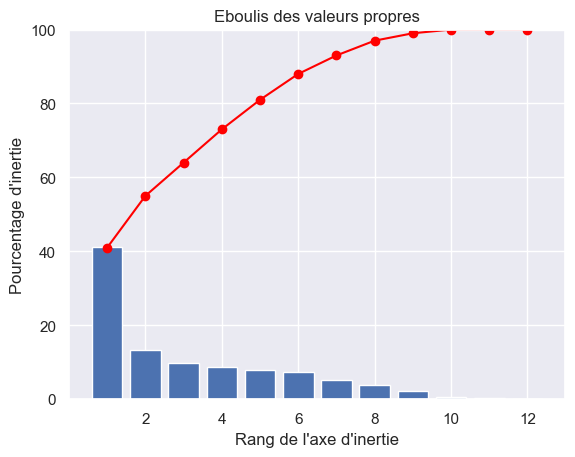

In [48]:
plt.bar (x_list,scree)
plt.plot (x_list, scree_cum, c="red", marker="o")
plt.xlabel ("Rang de l'axe d'inertie")
plt.ylabel ("Pourcentage d'inertie")
plt.title ("Eboulis des valeurs propres")
plt.ylim(0, 100)

plt.show(block=False)

On a en <font color="blue">bleu</font> la variance de chaque nouvelle composante, et en <font color="red">rouge</font> la variance cumulée.

**On remarque que 40% de la variance est comprise dans la 1ere composante et 97% dans les 8 premieres.**

**Le coude est à 8 composantes.**

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Cercle des corrélations</span></li>
</ul>

In [49]:
#pca = PCA(n_components=8)

# Ajuster le modèle PCA aux données scaled
#pca.fit(df_numerique_scaled)

# Transformation des données en utilisant PCA
#df_pca = pca.transform(df_numerique_scaled)

# Pcs 
pcs = pca.components_
display(pcs)

array([[ 3.74860601e-01,  6.13398081e-02,  4.40953131e-01,
         1.68702901e-02,  4.30050051e-01,  3.42781759e-01,
         2.44792566e-01,  4.10119152e-01, -1.08249344e-02,
         9.03003770e-02, -2.18611110e-02,  3.48826521e-01],
       [ 2.98739528e-01, -4.72360888e-01, -5.36785391e-02,
        -9.95044570e-02, -9.12748243e-02, -3.93057990e-02,
        -2.34752567e-01, -7.06911545e-02,  2.20147697e-01,
         5.26577657e-01, -5.23466055e-01,  7.14112659e-02],
       [-2.47687990e-01,  1.70077975e-01,  5.68540583e-02,
         2.47076596e-01,  1.35964134e-01, -2.08434586e-01,
         3.50801843e-01, -5.19577028e-02,  6.50335588e-01,
        -2.07953753e-01, -4.34668108e-01,  5.13288409e-02],
       [ 1.61091559e-01,  3.64641446e-01, -4.05999644e-02,
         7.96260869e-01, -4.84518743e-02, -5.73509358e-02,
        -1.32232255e-01, -8.36416230e-02, -1.13940390e-01,
         3.99224437e-01,  4.98669881e-02, -2.09550060e-02],
       [-6.28267012e-02,  6.45430415e-02,  2.0697859

In [50]:
# Transposons les composantes principales
pcs_transposed = pcs.T
display(pcs_transposed)

array([[ 3.74860601e-01,  2.98739528e-01, -2.47687990e-01,
         1.61091559e-01, -6.28267012e-02, -1.69827608e-01,
         5.12845291e-02, -4.09576058e-02, -9.88415023e-02,
        -5.15986287e-01, -6.07985713e-01, -1.34177689e-02],
       [ 6.13398081e-02, -4.72360888e-01,  1.70077975e-01,
         3.64641446e-01,  6.45430415e-02, -5.46363929e-01,
        -5.36866335e-01, -1.21565925e-01, -6.91339729e-03,
         1.76701873e-02, -7.19121260e-02, -2.87213829e-03],
       [ 4.40953131e-01, -5.36785391e-02,  5.68540583e-02,
        -4.05999644e-02,  2.06978594e-03,  3.40184402e-02,
        -9.12679873e-03, -6.35151664e-02,  2.06595152e-01,
        -3.40634102e-01,  4.46327175e-01,  6.59240549e-01],
       [ 1.68702901e-02, -9.95044570e-02,  2.47076596e-01,
         7.96260869e-01, -2.25773783e-01,  4.30648866e-01,
         2.37713433e-01,  3.54104200e-02, -3.27118708e-03,
         1.10905392e-02, -1.66016721e-02,  1.15283584e-02],
       [ 4.30050051e-01, -9.12748243e-02,  1.3596413

In [51]:
# Affichons la même chose mais version **pandas** :
pcs = pd.DataFrame(pcs)
display(pcs)

0   1   2   3   4   5   6   7   8   9   10  11
0    0   0   0   0   0   0   0   0  -0   0  -0   0
1    0  -0  -0  -0  -0  -0  -0  -0   0   1  -1   0
2   -0   0   0   0   0  -0   0  -0   1  -0  -0   0
3    0   0  -0   1  -0  -0  -0  -0  -0   0   0  -0
4   -0   0   0  -0   0  -0   1  -0  -0   0   0  -0
5   -0  -1   0   0   0  -0   0   0  -1  -0  -0   0
6    0  -1  -0   0   0  -0   0   0   0   0   1  -0
7   -0  -0  -0   0  -0  -0  -0  -0   0  -0   0   1
8   -0  -0   0  -0   0  -1  -0   1  -0  -0   0  -0
9   -1   0  -0   0  -0   0   0   1   0   0  -0   0
10  -1  -0   0  -0   0   0  -0  -0   0   0   0  -0
11  -0  -0   1   0  -1  -0   0   0   0   0   0   0

In [52]:
features = colonnes_numeriques
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Population en 2021 (en millions d'habitants)  \
F1                                              0   
F2                                              0   
F3                                             -0   
F4                                              0   
F5                                             -0   
F6                                             -0   
F7                                              0   
F8                                             -0   
F9                                             -0   
F10                                            -1   
F11                                            -1   
F12                                            -0   

     Disponibilité alimentaire (Kcal/personne/jour)  Nourriture (en tonnes)  \
F1                                                0                       0   
F2                                               -0                      -0   
F3                                                0                       0   
F4                                                0                      -0   
F5                                                0                       0   
F6                                               -1                       0   
F7                                               -1                      -0   
F8                                               -0                      -0   
F9                                               -0                       0   
F10                                               0                      -0   
F11                                              -0                       0   
F12                                              -0                       1   

     Pertes (en tonnes)  Production  Importations (en millions de $)  \
F1                    0           0                                0   
F2                   -0          -0                               -0   
F3                    0           0                               -0   
F4                    1          -0                               -0   
F5                   -0           0                               -0   
F6                    0           0                               -0   
F7                    0           0                               -0   
F8                    0          -0                               -0   
F9                   -0           0                               -1   
F10                   0          -0                                0   
F11                  -0           0                                0   
F12                   0          -1                               -0   

     Exportations (en millions de $)  PIB 2021 (en millions USD)  \
F1                                 0                           0   
F2                                -0                          -0   
F3                                 0                          -0   
F4                                -0                          -0   
F5                                 1                          -0   
F6                                 0                           0   
F7                                 0                           0   
F8                                -0                          -0   
F9                                -0                           1   
F10                                0                           1   
F11                               -0                          -0   
F12                                0                           0   

     % inflation (Décembre 2021)  \
F1                            -0   
F2                             0   
F3                             1   
F4                            -0   
F5                            -0   
F6                            -0   
F7                             0   
F8                             0   
F9                            -0   
F10                            0   
F11                            0   
F12                            0 

In [53]:
# La fonction .T (transpose le DataFrame, échangeant ses lignes et ses colonnes).
pcs.T

F1  F2  F3  F4  F5  F6  \
Population en 2021 (en millions d'habitants)         0   0  -0   0  -0  -0   
Disponibilité alimentaire (Kcal/personne/jour)       0  -0   0   0   0  -1   
Nourriture (en tonnes)                               0  -0   0  -0   0   0   
Pertes (en tonnes)                                   0  -0   0   1  -0   0   
Production                                           0  -0   0  -0   0   0   
Importations (en millions de $)                      0  -0  -0  -0  -0  -0   
Exportations (en millions de $)                      0  -0   0  -0   1   0   
PIB 2021 (en millions USD)                           0  -0  -0  -0  -0   0   
% inflation (Décembre 2021)                         -0   0   1  -0  -0  -1   
Nombre de personnes sous-alimentées en 2021 (en...   0   1  -0   0   0  -0   
Stabilité politique 2021 (indice)                   -0  -1  -0   0   0  -0   
Total emission N2O (kilotonnes) imputable à l'é...   0   0   0  -0  -0   0   

                                                    F7  F8  F9  F10  F11  F12  
Population en 2021 (en millions d'habitants)         0  -0  -0   -1   -1   -0  
Disponibilité alimentaire (Kcal/personne/jour)      -1  -0  -0    0   -0   -0  
Nourriture (en tonnes)                              -0  -0   0   -0    0    1  
Pertes (en tonnes)                                   0   0  -0    0   -0    0  
Production                                           0  -0   0   -0    0   -1  
Importations (en millions de $)                     -0  -0  -1    0    0   -0  
Exportations (en millions de $)                      0  -0  -0    0   -0    0  
PIB 2021 (en millions USD)                           0  -0   1    1   -0    0  
% inflation (Décembre 2021)                          0   0  -0    0    0    0  
Nombre de personnes sous-alimentées en 2021 (en...   0  -0  -0    0    0    0  
Stabilité politique 2021 (indice)                    1   0   0   -0    0    0  
Total emission N2O (kilotonnes) imputable à l'é...  -0   1  -0    0   -0    0

<Axes: >

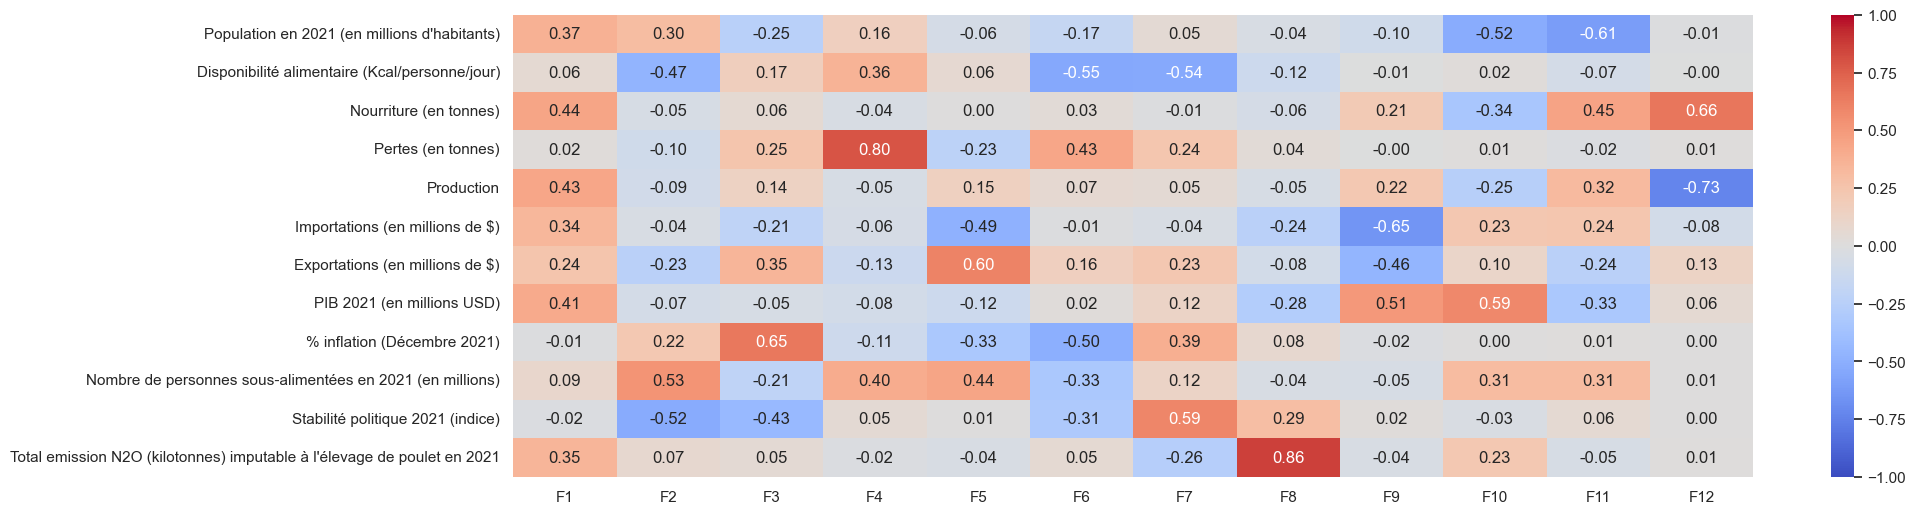

In [54]:
# Et pour une représentation plus visuelle :
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [55]:
# Définissons nos axes x et y.  
x, y = 0,1

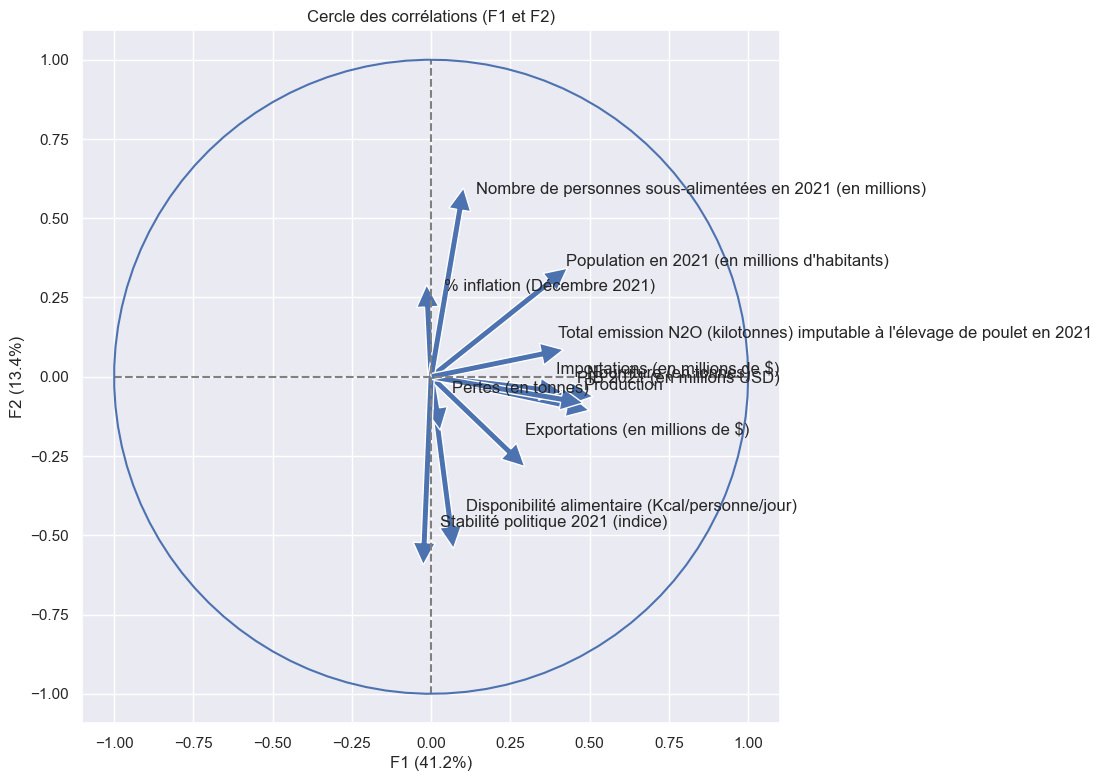

In [56]:
# Cercle des corrélations
fig, ax = plt.subplots(figsize=(9, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  
             pca.components_[0, i],  
             pca.components_[1, i],  
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
plt.show(block=False)

L'axe ou la composante F1 est corrélé aux variables telles que la population, les émissions de gaz N2O, la production, les importations, les exportations et les pertes. Nous pouvons alors parler d'**Éconodémographie** : ce terme met l'accent sur l'interaction entre les aspects économiques et démographiques, avec une implication sous-jacente des impacts environnementaux.

L'axe ou la composante F2 est corrélé aux variables telles que la stabilité politique, la sous-alimentation et la disponibilité alimentaire. Nous pouvons définir que la composante F2 illustre l'aspect **Politico-alimentaire** de nos variables : ce terme fusionne "politique" et "alimentaire," indiquant comment la stabilité politique influence la sécurité alimentaire et les niveaux de sous-alimentation.

In [57]:
x_y = (0,1)
x_y

(0, 1)

In [58]:
# Graphique du cercle de corrélation en mode "fonction" - def :
def correlation_graph(pca, x_y, features): 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x, y = x_y

    # Vérifie que x et y sont dans la plage des composantes
    if x >= pca.n_components_ or y >= pca.n_components_:
        raise ValueError(f"Les indices des composantes doivent être inférieurs à {pca.n_components_}")

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(0, 0, 
                 pca.components_[x, i],  
                 pca.components_[y, i],  
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02)

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y], 1)))

    # Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)


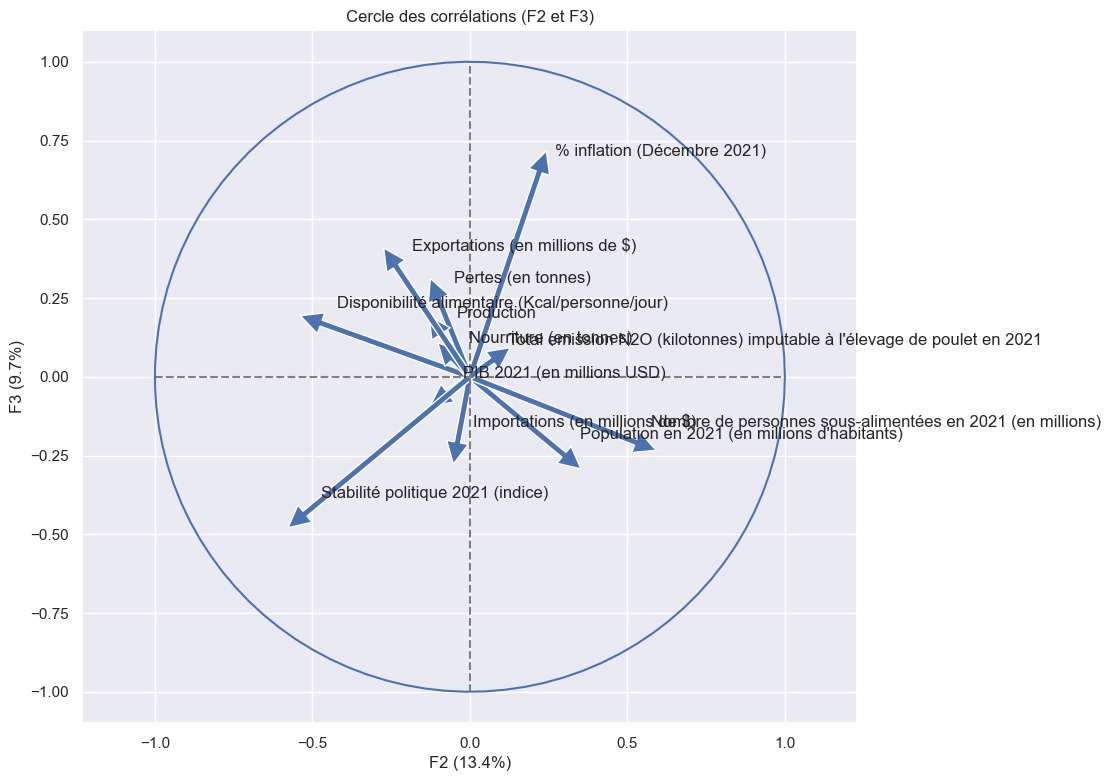

In [59]:
correlation_graph(pca, (1,2), features)

Ici notre axe (ou composante) F3 est corrélé aux variables exportations, stabilité politque, % inflation avec un peu plus d'impact, les pertes, disponibilité alimentaire et importations 
Nous avons donc un axe ou composante F3 - **politique et economique** 

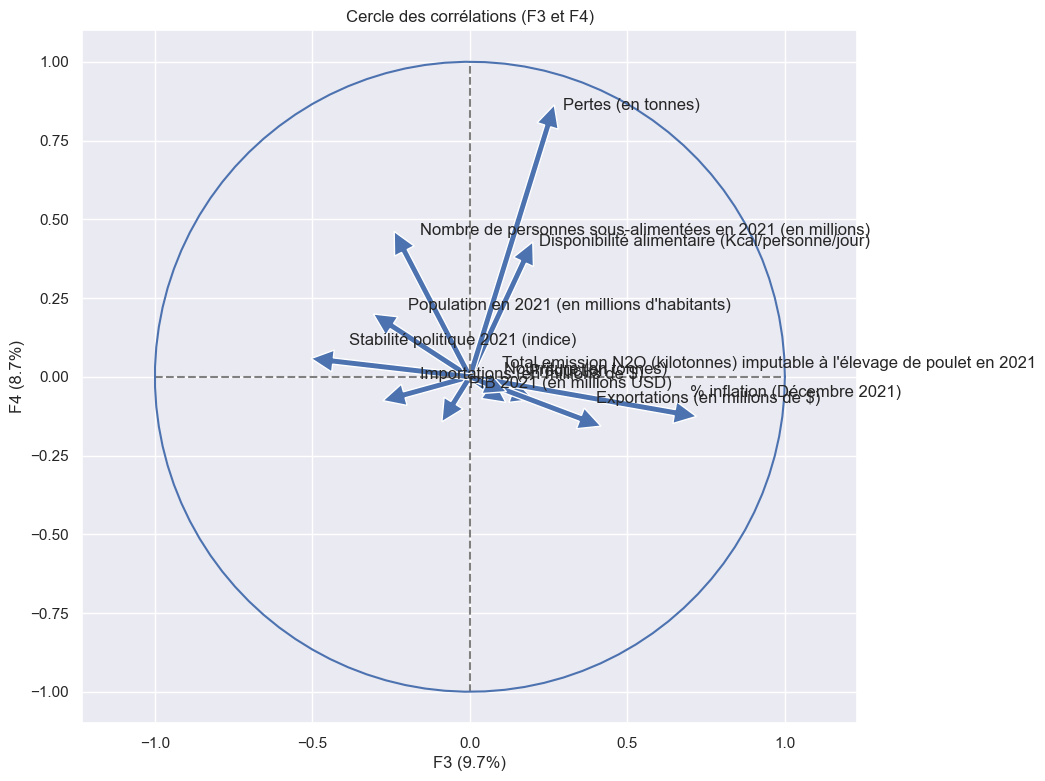

In [60]:
correlation_graph(pca, (2,3), features)

Enfin notre composante F4 qui représente 8,7% de l'information (nous n'irons pas au delà) projette les variables pertes, populations, disponibilié alimentaire et de sous nutrition.
C'est donc un axe **sociodémographique** dans le sens ou l'axe sociodémographique explore les interactions entre la population, la disponibilité alimentaire, les pertes alimentaires, et la sous-nutrition. 
Cet axe permet d'analyser comment les dynamiques démographiques influencent la sécurité alimentaire et les niveaux de sous-nutrition dans différentes régions.

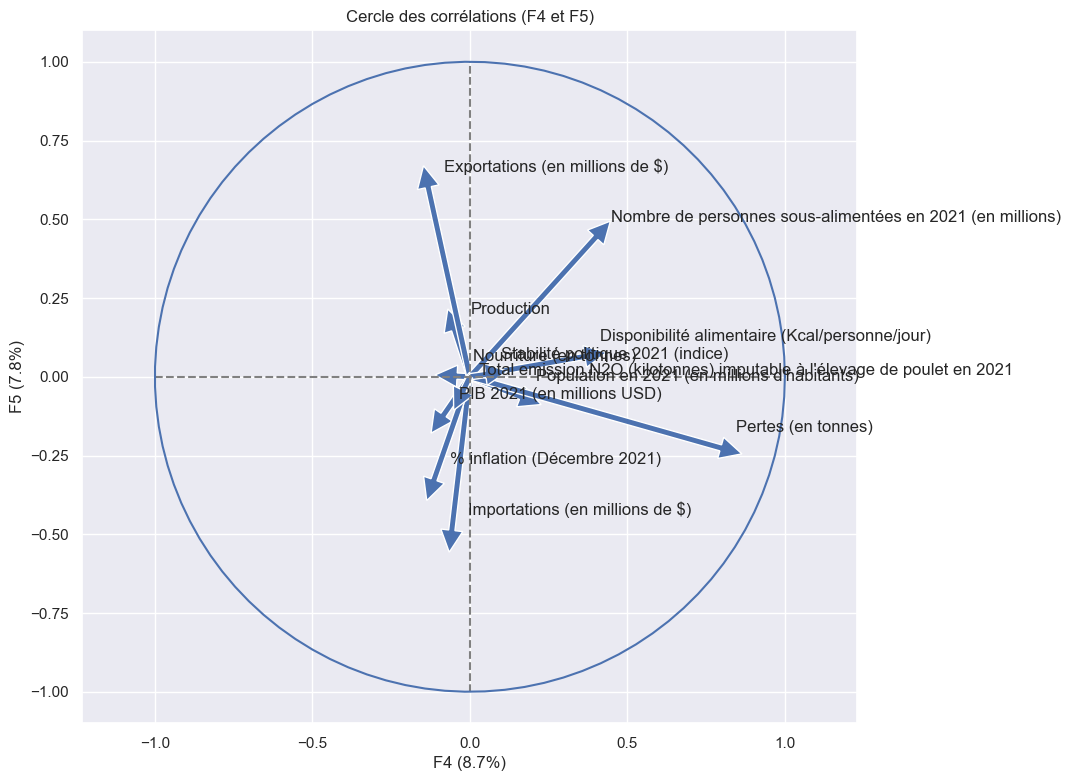

In [61]:
correlation_graph(pca, (3,4), features)

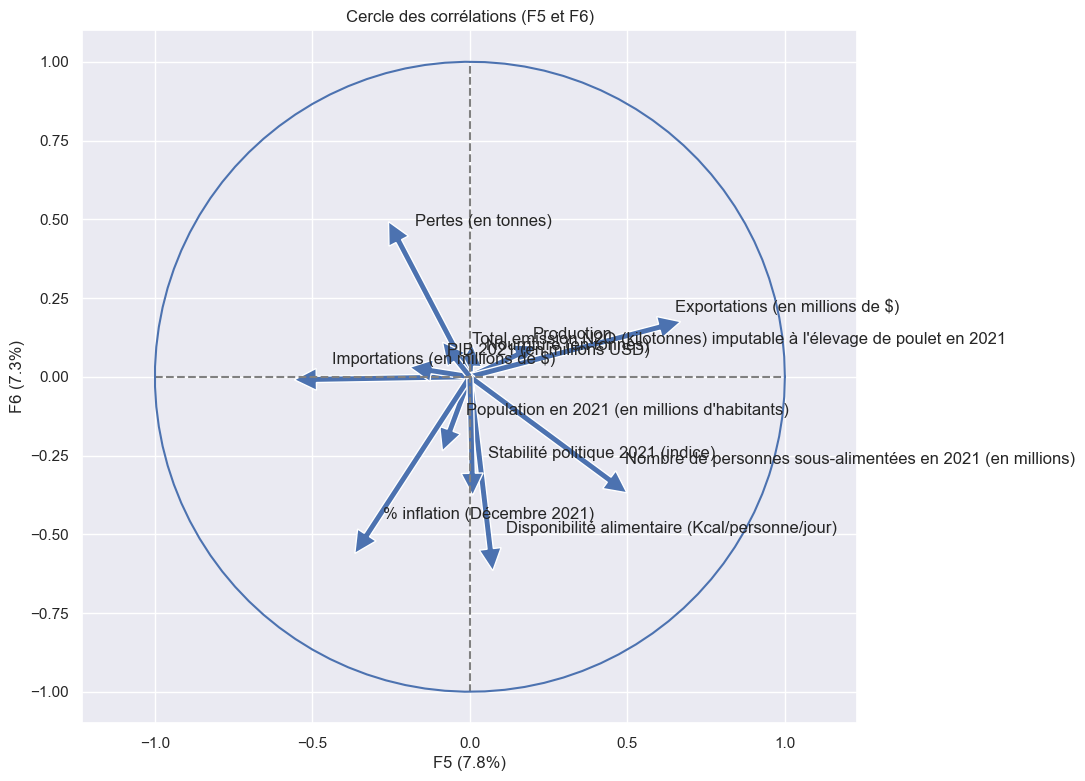

In [62]:
correlation_graph(pca, (4,5), features)

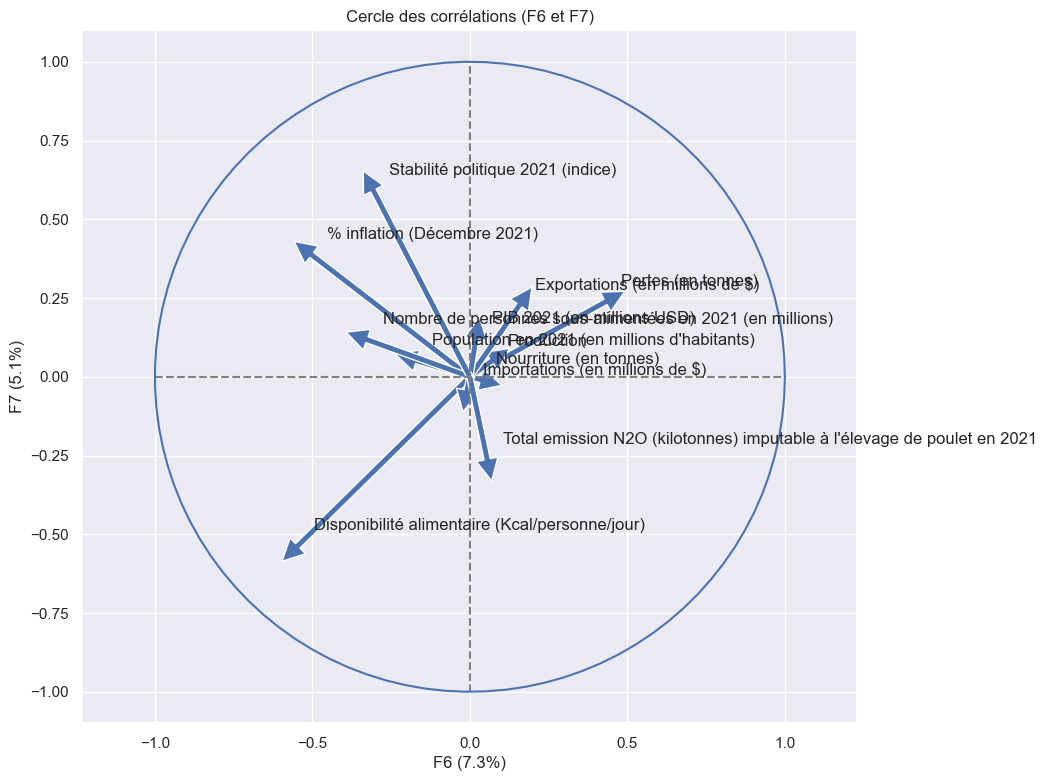

In [63]:
correlation_graph(pca, (5,6), features)

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Projection des individus (Pays)</span></li>
</ul>

In [64]:
x_y

(0, 1)

In [65]:
X_proj = pca.transform(df_numerique_scaled)
X_proj[:5]

array([[-4.39932391e-01,  2.26575660e+00,  8.92042874e-01,
        -2.49184218e-01,  1.21742357e-01,  9.55473915e-01,
        -1.05453740e+00, -7.91141223e-01, -6.98214604e-02,
         1.57141247e-01, -2.86121053e-02, -3.35014429e-03],
       [ 1.03585084e+00, -3.76644962e-01,  4.54922533e-01,
         4.43940680e-01,  5.64415726e-02, -5.92257498e-01,
        -1.38714126e+00, -4.23865397e-01,  6.05432099e-02,
        -3.59851661e-01,  5.51346096e-01,  1.61407782e-01],
       [-6.30984799e-01, -2.69722522e-01, -1.19503902e-01,
        -1.82948327e-02,  2.71157305e-02, -1.15246356e-01,
        -7.98667300e-02, -1.65906683e-02,  1.07326962e-01,
        -5.69091200e-02, -5.39359665e-02,  1.11163867e-02],
       [-3.09456307e-01,  7.92631276e-01,  2.79760468e-01,
        -3.66857747e-01, -9.97776503e-02,  5.90587496e-01,
        -3.23118184e-01,  6.94049639e-02,  1.25810085e-01,
        -1.02386516e-01, -1.77703225e-01, -1.36383388e-03],
       [ 2.04887926e+00, -8.07242033e-01, -8.8580019

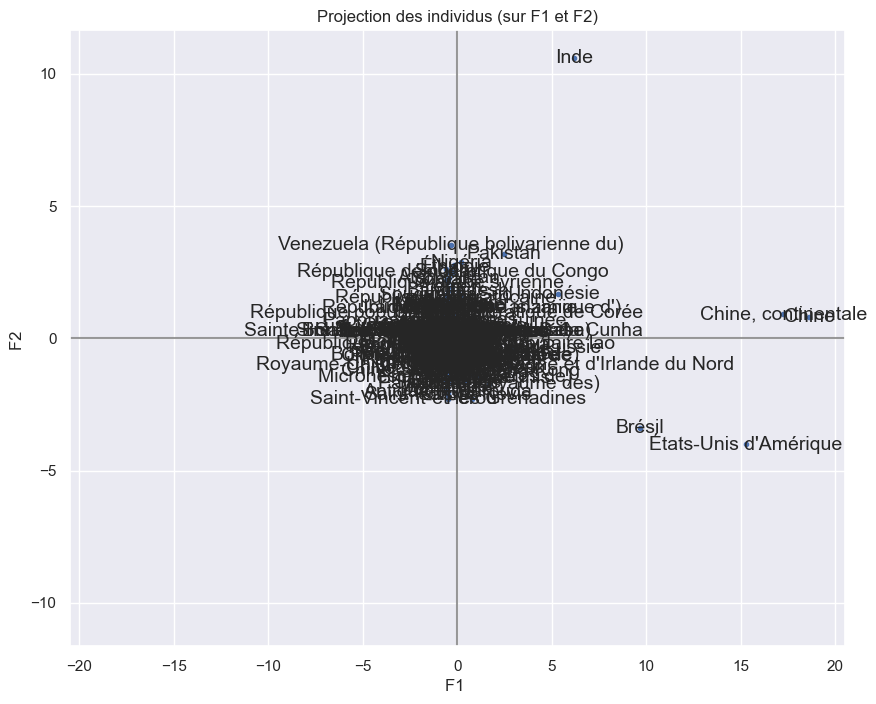

In [66]:
# Création de la fonction de projection des individus - factorial planes :

def display_factorial_planes(X_projected, x_y, pca=None, labels=None, alpha=1, figsize=[10,8], marker="."):
    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On vérifie la variable axis 
    if not len(x_y) == 2: 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y) >= X_projected.shape[1]: 
        raise AttributeError("la variable axis n'est pas bonne")   

    # On définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Les points    
    ax.scatter(X_projected[:, x], X_projected[:, y], alpha=alpha, marker=marker)

    # Si des labels ont été fournis, on les affiche pour chaque point
    if labels is not None:
        for i in range(len(labels)):
            ax.text(X_projected[i, x], X_projected[i, y], labels[i], fontsize='14', ha='center', va='center') 

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca: 
        v1 = str(round(100*pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y])) + " %"
    else: 
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_projected[:, x]).max() * 1.1
    y_max = np.abs(X_projected[:, y]).max() * 1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    ax.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    ax.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

# Appeler la fonction display_factorial_planes avec les données projetées et les labels
labels = df_final["Zone"].values
x_y = [0, 1]
display_factorial_planes(X_proj, x_y,labels=labels) # inclure labels=labels pour afficher les noms des pays


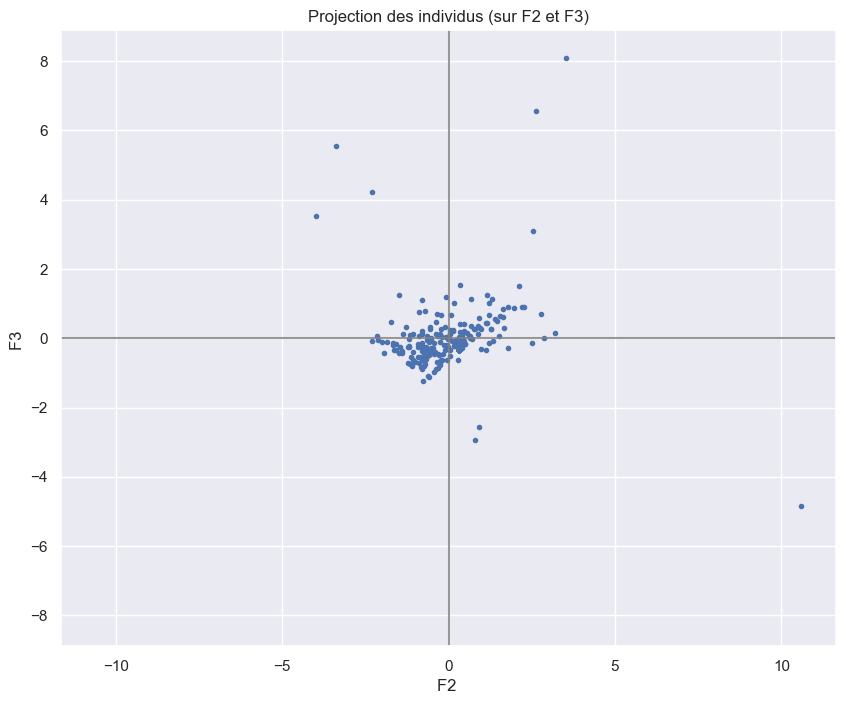

In [67]:
x_y = [1, 2]
display_factorial_planes(X_proj, x_y) # inclure labels=labels pour afficher les noms des pays


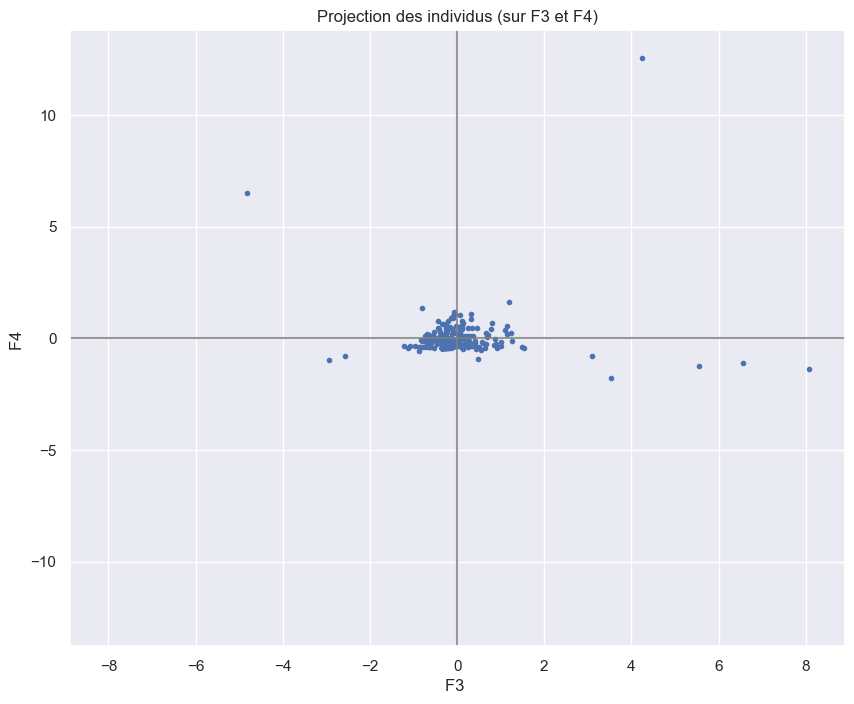

In [68]:
x_y = [2, 3]
display_factorial_planes(X_proj, x_y) # inclure labels=labels pour afficher les noms des pays

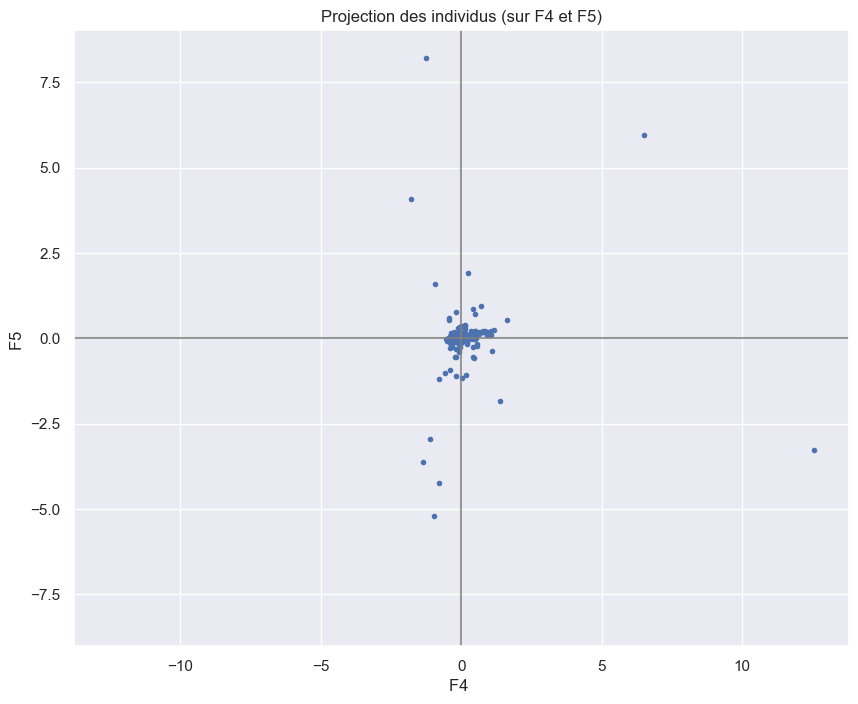

In [69]:
x_y = [3, 4]
display_factorial_planes(X_proj, x_y) # inclure labels=labels pour afficher les noms des pays

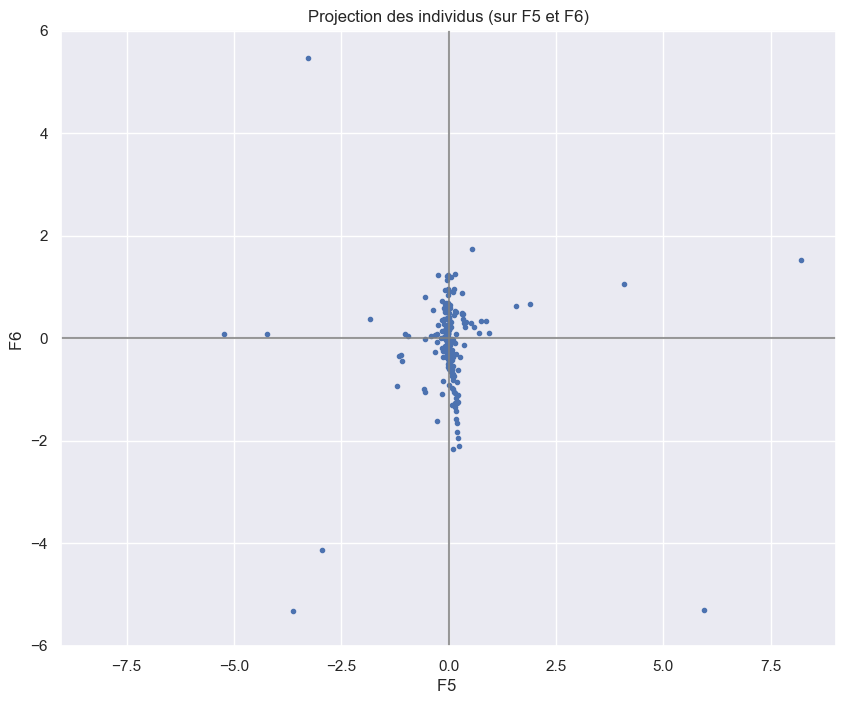

In [70]:
x_y = [4, 5]
display_factorial_planes(X_proj, x_y) # inclure labels=labels pour afficher les noms des pays

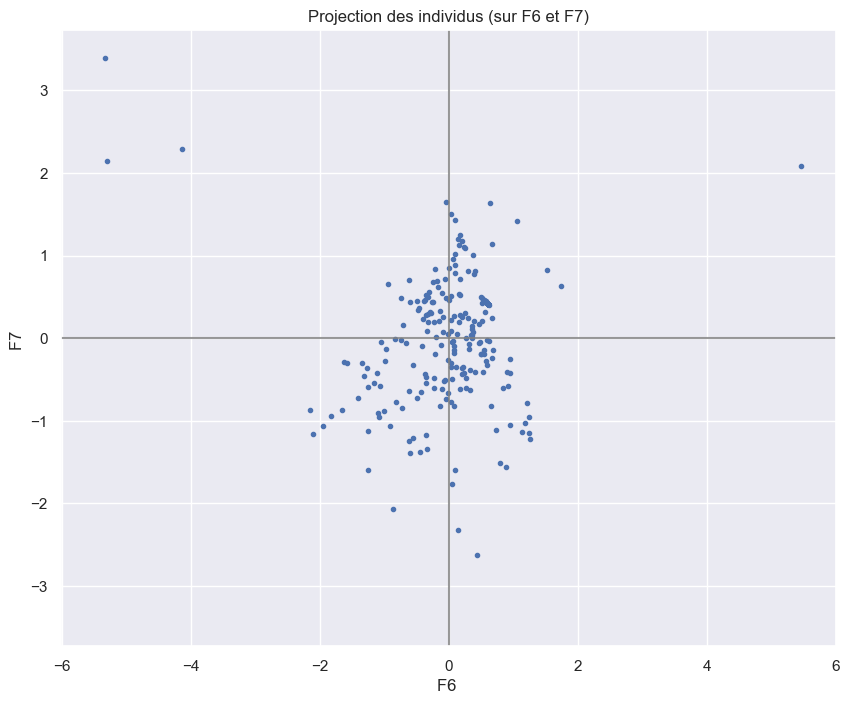

In [71]:
x_y = [5, 6]
display_factorial_planes(X_proj, x_y) # inclure labels=labels pour afficher les noms des pays

In [72]:
# Meilleur visibilité, utilisons la bibliotheque plotly.express : 

import plotly.express as px

def display_factorial_planes_interactive(X_projected, x_y, labels=None, figsize=[800,600]):
    fig = px.scatter(x=X_projected[:, x_y[0]], y=X_projected[:, x_y[1]], text=labels)
    fig.update_traces(marker=dict(size=5))
    fig.update_layout(
        title=f"Projection des individus (sur F{x_y[0]+1} et F{x_y[1]+1})", 
        xaxis_title=f"F{x_y[0]+1}", 
        yaxis_title=f"F{x_y[1]+1}",
        width=figsize[0], 
        height=figsize[1]
    )
    fig.show()

x_y = [0, 1] # à modifier pour voir F2 et F3 (>[1,2])
display_factorial_planes_interactive(X_proj, x_y, labels=labels)

In [73]:
x_y = [1, 2] # à modifier pour voir F3 et F4 (>[2,3])
display_factorial_planes_interactive(X_proj, x_y, labels=labels)

In [74]:
x_y = [2, 3] # à modifier pour voir F4 et F5 (>[3,4])
display_factorial_planes_interactive(X_proj, x_y, labels=labels)

In [75]:
x_y = [3, 4] 
display_factorial_planes_interactive(X_proj, x_y, labels=labels)

In [76]:
x_y = [4, 5] 
display_factorial_planes_interactive(X_proj, x_y, labels=labels)

In [77]:
x_y = [5, 6] 
display_factorial_planes_interactive(X_proj, x_y, labels=labels)

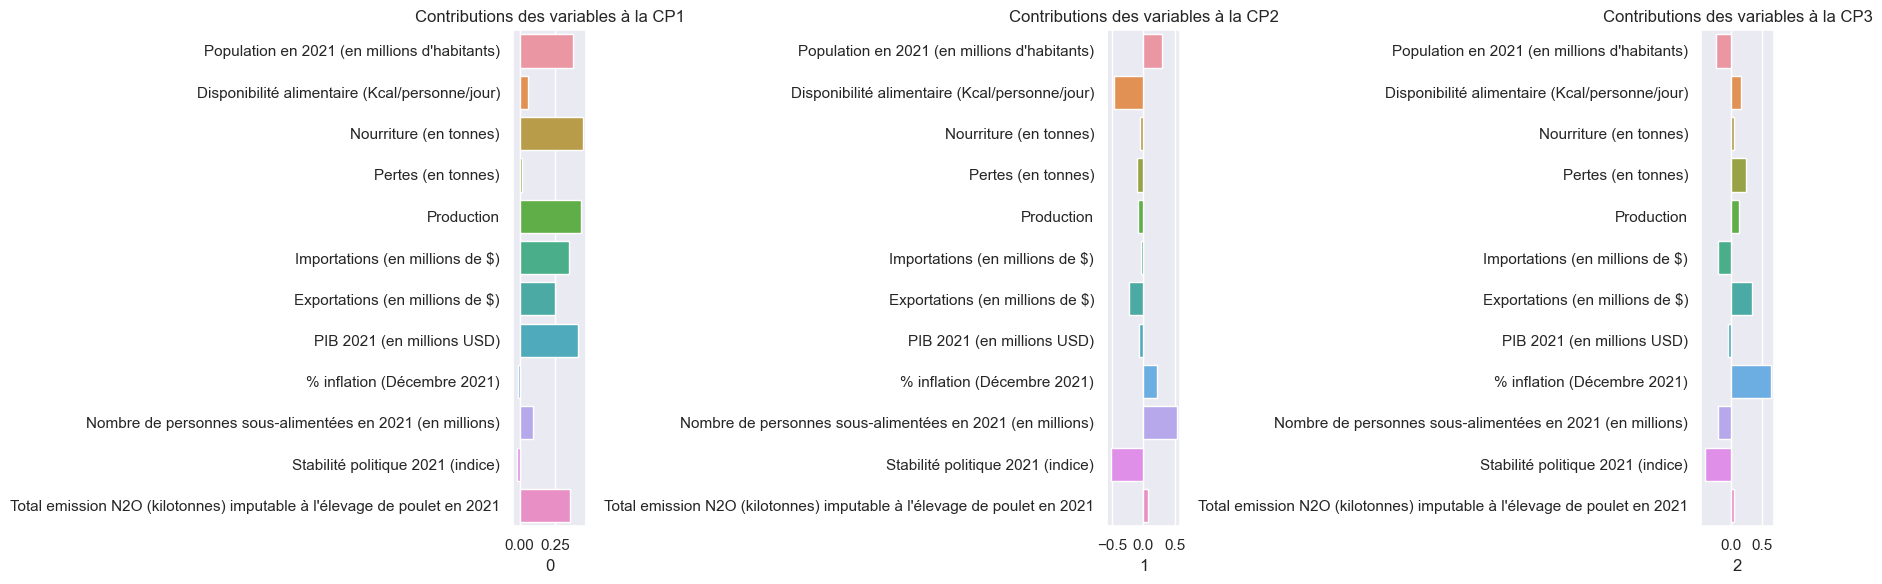

In [78]:
# Fonction pour la rotation Varimax qui permet d'avoir un tableau montrant la contribution des variables sur chaque composantes

def varimax(Phi, gamma=1.0, q=20, tol=1e-6):
    p, k = Phi.shape
    R = np.eye(k)
    d = 0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u, s, vh = np.linalg.svd(np.dot(Phi.T, Lambda**3 - (gamma / p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T, Lambda))))))
        R = np.dot(u, vh)
        d = np.sum(s)
        if d_old != 0 and d / d_old < 1 + tol: break
    return np.dot(Phi, R)

df_data = df_numerique

# Normalisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data)

# Rapide ACP
pca = PCA(n_components=7)
principal_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

# Contributions des variables aux composantes principales
components = pca.components_
df_components = pd.DataFrame(components, columns=df_data.columns)

# Affichage des contributions des variables aux 3 premieres composantes principales
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i in range(3):
    sns.barplot(ax=axes[i], y=df_components.columns, x=df_components.iloc[i], orient="h")
    axes[i].set_title(f"Contributions des variables à la CP{i+1}")

plt.tight_layout()
plt.show()

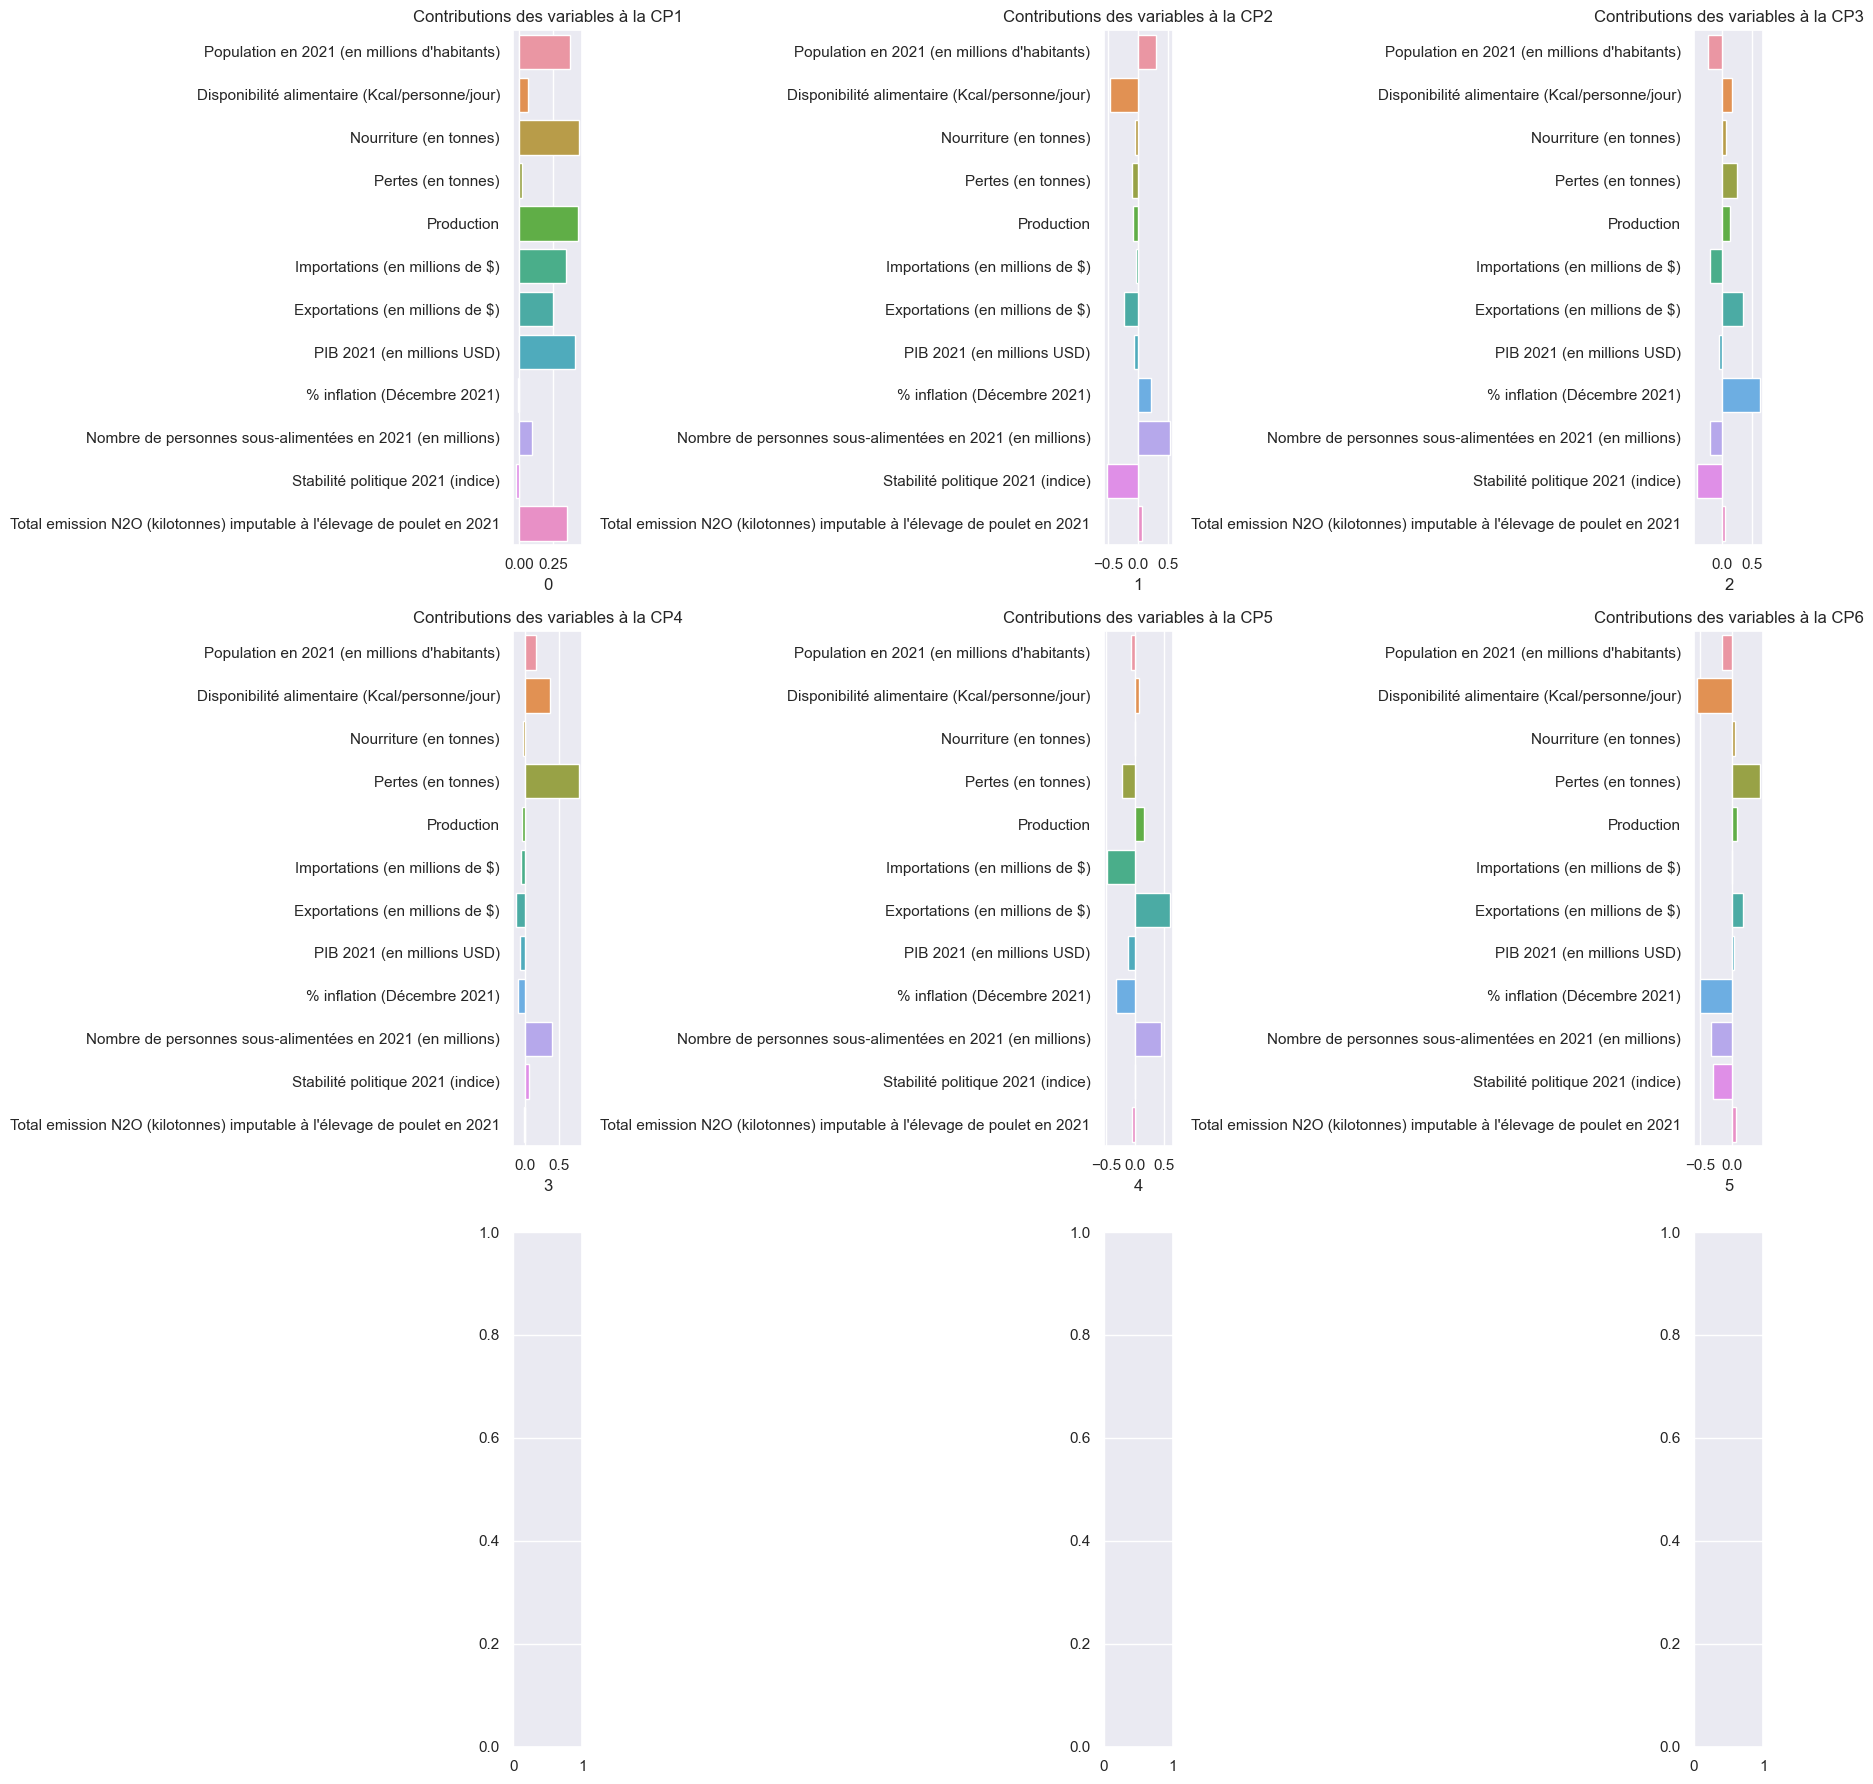

In [79]:
# Affichage des contributions des variables aux 6 composantes principales :

fig, axes = plt.subplots(3, 3, figsize=(18, 18)) 
for i in range(6):
    sns.barplot(ax=axes[i//3, i%3], y=df_components.columns, x=df_components.iloc[i], orient="h")
    axes[i//3, i%3].set_title(f"Contributions des variables à la CP{i+1}")

plt.tight_layout()
plt.show()

In [80]:
# Enrergistrement CSV de mon df_final pour la phase 2
chemin_fichier_final = 'C:\\Users\\Edine\\Documents\\OPC\\P9\\TRAVAUX\\Clustering\\df_final.csv'
chemin_fichier_numerique = 'C:\\Users\\Edine\\Documents\\OPC\\P9\\TRAVAUX\\Clustering\\df_numerique.csv'

# .to_csv

df_final.to_csv(chemin_fichier_final, index=False, sep=';')
df_numerique.to_csv(chemin_fichier_numerique, index=False, sep=';')

print(f"df_final sauvegardé en {chemin_fichier_final}")
print(f"df_numerique sauvegardé en {chemin_fichier_numerique}")

df_final sauvegardé en C:\Users\Edine\Documents\OPC\P9\TRAVAUX\Clustering\df_final.csv
df_numerique sauvegardé en C:\Users\Edine\Documents\OPC\P9\TRAVAUX\Clustering\df_numerique.csv
